# Healthcare Unsupervised Anomaly Detection

<div style="text-align: right; font-size: large; color:darkorchid">
        <b><i>By</i> <span style='font-size:20px;'>&#8680;</span> 
            </b><i>Pushpendra Kumar</i>
</div>

### Overview

Healthcare fraud diverts crucial funding from vital areas such as medication and emergency services, driven by both practitioners and patients. To combat this issue, I have initiated a project focused on healthcare data anomaly detection. Through various unsupervised techniques, we aim to uncover irregularities indicating health concerns or fraudulent behavior.

Extensive Exploratory Data Analysis (EDA) helps reveal hidden anomalies and their implications. By leveraging advanced data visualization and analytics, we can extract insights for early detection and prevention. Our ultimate goal is to develop effective anomaly detection models, which are crucial for safeguarding patient health and optimizing healthcare operations.

### Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#filtering the warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [25]:
df = pd.read_csv('Healthcare Providers.csv')

In [26]:
# Shape of the data
df.shape

(100000, 27)

In [27]:
# First 5 rows
df.head()

index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                            NaN                          MD   
4                              E                          DO   

  Gender of the Provider Entity Type of the Provider  \
0                      F                           I   
1                      F                           I   
2                      M                           I   
3                      M                           I   
4                      M                           I   

  Street Address 1 of the Provider Street Address 2 of the Provider  ...  \
0                1402 S GRAND BLVD                   FDT 14TH FLOOR  ...   
1                  2950 VILLAGE DR                              NaN  ...   
2                20 WASHINGTON AVE                          STE 212  ...   
3               5746 N BROADWAY ST                              NaN  ...   
4                 875 MILITARY TRL                        SUITE 200  ...   

  HCPCS Code                                  HCPCS Description  \
0      99223  Initial hospital inpatient care, typically 70 ...   
1      G0202  Screening mammography, bilateral (2-view study...   
2      99348  Established patient home visit, typically 25 m...   
3      81002                            Urinalysis, manual test   
4      96372  Injection beneath the skin or into muscle for ...   

  HCPCS Drug Indicator Number of Services Number of Medicare Beneficiaries  \
0                    N                 27                               24   
1                    N                175                              175   
2                    N                 32                               13   
3                    N                 20                               18   
4                    N                 33                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758  

[5 ro

In [28]:
# Last 5 rows
df.tail()

index  National Provider Identifier  \
99995  3837311                    1386938868   
99996  2079360                    1215091327   
99997  8927965                    1902868185   
99998  8854571                    1891941183   
99999  3547535                    1356772156   

      Last Name/Organization Name of the Provider First Name of the Provider  \
99995                                       PAPES                       JOAN   
99996                                      HAYNER                   MARGARET   
99997                                    VALENCIA                       DANA   
99998                              GONZALEZ-LAMOS                    RAFAELA   
99999                                    RAMEZANI                     ELIIAN   

      Middle Initial of the Provider Credentials of the Provider  \
99995                            NaN                          PT   
99996                              S                        ARNP   
99997                            NaN                        M.D.   
99998                            NaN                         NaN   
99999                            NaN                         NaN   

      Gender of the Provider Entity Type of the Provider  \
99995                      F                           I   
99996                      F                           I   
99997                      M                           I   
99998                      F                           I   
99999                      F                           I   

      Street Address 1 of the Provider Street Address 2 of the Provider  ...  \
99995               324 E BALTIMORE ST                              NaN  ...   
99996                    645 NW 4TH ST                              NaN  ...   
99997                 3009 N BALLAS RD                       SUITE 202B  ...   
99998              2365 BOSTON POST RD                        SUITE 201  ...   
99999        444 MIDDLE NECK RD APT 1H                              NaN  ...   

      HCPCS Code                                  HCPCS Description  \
99995      97162  Evaluation of physical therapy, typically 30 m...   
99996      99213  Established patient office or other outpatient...   
99997      93320  Doppler ultrasound study of heart blood flow, ...   
99998      G0008          Administration of influenza virus vaccine   
99999      97112  Therapeutic procedure to re-educate brain-to-n...   

      HCPCS Drug Indicator Number of Services  \
99995                    N                 20   
99996                    N                136   
99997                    N                 11   
99998                    N                 12   
99999                    N                589   

      Number of Medicare Beneficiaries  \
99995                               20   
99996                              107   
99997                               11   
99998                               12   
99999                               76   

      Number of Distinct Medicare Beneficiary/Per Day Services  \
99995                                                 20         
99996                                                136         
99997                                                 11         
99998                                                 12         
99999                                                587         

      Average Medicare Allowed Amount Average Submitted Charge Amount  \
99995                         85.3725                             214   
99996                           61.27                    144.05147059   
99997                           17.98                    109.54545455   
99998                           30.54                              65   
99999                    38.601052632                    46.867572156   

      Average Medicare Payment Amount Average Medicare Standardized Amount  
99995                         60.7255                              62.2485  
99996                  

In [29]:
# Information regarding datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [30]:
# Columns of the dataset
df.columns

Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

In [31]:
# Statistical Description of dataset
df.describe()

index  National Provider Identifier  Zip Code of the Provider
count  1.000000e+05                  1.000000e+05              1.000000e+05
mean   4.907646e+06                  1.498227e+09              4.163820e+08
std    2.839633e+06                  2.874125e+08              3.082566e+08
min    2.090000e+02                  1.003001e+09              6.010000e+02
25%    2.458791e+06                  1.245669e+09              1.426300e+08
50%    4.901266e+06                  1.497847e+09              3.633025e+08
75%    7.349450e+06                  1.740374e+09              6.819881e+08
max    9.847440e+06                  1.993000e+09              9.990166e+08

## Exploratory Data Analysis (EDA)

### Handling Missing Values

In [32]:
# Checking missing values
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

<div class="alert alert-block alert-info">
<b>Insights:</b> Dropping the coloumns:
    <br>'index',
    'National Provider Identifier',
    'Last Name/Organization Name of the Provider',
    'First Name of the Provider',
    'Middle Initial of the Provider',
    'Street Address 1 of the Provider',
    'Street Address 2 of the Provider'.
    
    As these doesn't add much towards detecting anomaly.
    Meanwhile filling rest missing columnns:
    ('Credentials of the Provider','Gender of the Provider') with their mode values.
</div>

In [33]:
# Dropping columns
DropColumns = ['index', 'National Provider Identifier','Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider']
df = df.drop(DropColumns, axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               92791 non-null   object 
 1   Gender of the Provider                                    95746 non-null   object 
 2   Entity Type of the Provider                               100000 non-null  object 
 3   City of the Provider                                      100000 non-null  object 
 4   Zip Code of the Provider                                  100000 non-null  float64
 5   State Code of the Provider                                100000 non-null  object 
 6   Country Code of the Provider                              100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Medic

In [35]:
# Filling missing with mode values
df["Credentials of the Provider"] = df["Credentials of the Provider"].fillna(df["Credentials of the Provider"].mode()[0])
df["Gender of the Provider"] = df["Gender of the Provider"].fillna(df["Gender of the Provider"].mode()[0])

In [36]:
# Checking missing values again
df.isnull().sum()

Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average 

<div class="alert alert-block alert-info">
<b>Insights:</b> Converting these object columns which are meant to be numeric:
    <br>
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'.
    <br>
     <b>Also removing any comma separators if they are present.
</div>

In [37]:
# Data Cleaning

def RemoveComma(x):
    return str(x).replace(",","")  # Convert to string before replacing comma

numericCols = ['Number of Services', 'Number of Medicare Beneficiaries', 
               'Number of Distinct Medicare Beneficiary/Per Day Services', 
               'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
               'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

df[numericCols] = df[numericCols].applymap(RemoveComma).apply(pd.to_numeric, errors='ignore')

In [38]:
#Checking information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  object 
 1   Gender of the Provider                                    100000 non-null  object 
 2   Entity Type of the Provider                               100000 non-null  object 
 3   City of the Provider                                      100000 non-null  object 
 4   Zip Code of the Provider                                  100000 non-null  float64
 5   State Code of the Provider                                100000 non-null  object 
 6   Country Code of the Provider                              100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Medic

### Checking Duplicate Values

In [41]:
# Checking for duplicates
df.duplicated().any()

True

In [43]:
# Finding duplicate rows in the entire DataFrame
duplicate_rows = df[df.duplicated()]
duplicate_rows

Credentials of the Provider Gender of the Provider  \
2047                          MD                      M   

     Entity Type of the Provider City of the Provider  \
2047                           I                TAMPA   

      Zip Code of the Provider State Code of the Provider  \
2047               336125513.0                         FL   

     Country Code of the Provider         Provider Type  \
2047                           US  Diagnostic Radiology   

     Medicare Participation Indicator Place of Service HCPCS Code  \
2047                                Y                O      84520   

                                  HCPCS Description HCPCS Drug Indicator  \
2047  Urea nitrogen level to assess kidney function                    N   

      Number of Services  Number of Medicare Beneficiaries  \
2047                20.0                                20   

      Number of Distinct Medicare Beneficiary/Per Day Services  \
2047                                                 20          

      Average Medicare Allowed Amount  Average Submitted Charge Amount  \
2047                             5.42                             15.0   

      Average Medicare Payment Amount  Average Medicare Standardized Amount  
2047                             5.31                                  5.31

In [44]:
# Dropping duplicates
df = df.drop_duplicates()

In [45]:
#Checking duplicates again
df.duplicated().any()

False

In [46]:
df.head()

Credentials of the Provider Gender of the Provider  \
0                        M.D.                      F   
1                        M.D.                      F   
2                         DPM                      M   
3                          MD                      M   
4                          DO                      M   

  Entity Type of the Provider City of the Provider  Zip Code of the Provider  \
0                           I          SAINT LOUIS               631041004.0   
1                           I         FAYETTEVILLE               283043815.0   
2                           I          NORTH HAVEN                64732343.0   
3                           I          KANSAS CITY               641183998.0   
4                           I              JUPITER               334585700.0   

  State Code of the Provider Country Code of the Provider  \
0                         MO                           US   
1                         NC                           US   
2                         CT                           US   
3                         MO                           US   
4                         FL                           US   

             Provider Type Medicare Participation Indicator Place of Service  \
0        Internal Medicine                                Y                F   
1  Obstetrics & Gynecology                                Y                O   
2                 Podiatry                                Y                O   
3        Internal Medicine                                Y                O   
4        Internal Medicine                                Y                O   

  HCPCS Code                                  HCPCS Description  \
0      99223  Initial hospital inpatient care, typically 70 ...   
1      G0202  Screening mammography, bilateral (2-view study...   
2      99348  Established patient home visit, typically 25 m...   
3      81002                            Urinalysis, manual test   
4      96372  Injection beneath the skin or into muscle for ...   

  HCPCS Drug Indicator  Number of Services  Number of Medicare Beneficiaries  \
0                    N                27.0                                24   
1                    N               175.0                               175   
2                    N                32.0                                13   
3                    N                20.0                                18   
4                    N                33.0                                24   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27          
1                                                175          
2                                                 32          
3                                                 20          
4                                                 31          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  
0                       157.262222                            160.908889  
1                       118.830000                            135.315257  
2                        64.439688                             60.595937  
3                         3.430000                              3.430000  
4                        19.539394                             19.057576

In [47]:
# Cleaning 'Credentials of the Provider' Column
# Removing periods '.' if present
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.', '')

In [48]:
df.head()

Credentials of the Provider Gender of the Provider  \
0                          MD                      F   
1                          MD                      F   
2                         DPM                      M   
3                          MD                      M   
4                          DO                      M   

  Entity Type of the Provider City of the Provider  Zip Code of the Provider  \
0                           I          SAINT LOUIS               631041004.0   
1                           I         FAYETTEVILLE               283043815.0   
2                           I          NORTH HAVEN                64732343.0   
3                           I          KANSAS CITY               641183998.0   
4                           I              JUPITER               334585700.0   

  State Code of the Provider Country Code of the Provider  \
0                         MO                           US   
1                         NC                           US   
2                         CT                           US   
3                         MO                           US   
4                         FL                           US   

             Provider Type Medicare Participation Indicator Place of Service  \
0        Internal Medicine                                Y                F   
1  Obstetrics & Gynecology                                Y                O   
2                 Podiatry                                Y                O   
3        Internal Medicine                                Y                O   
4        Internal Medicine                                Y                O   

  HCPCS Code                                  HCPCS Description  \
0      99223  Initial hospital inpatient care, typically 70 ...   
1      G0202  Screening mammography, bilateral (2-view study...   
2      99348  Established patient home visit, typically 25 m...   
3      81002                            Urinalysis, manual test   
4      96372  Injection beneath the skin or into muscle for ...   

  HCPCS Drug Indicator  Number of Services  Number of Medicare Beneficiaries  \
0                    N                27.0                                24   
1                    N               175.0                               175   
2                    N                32.0                                13   
3                    N                20.0                                18   
4                    N                33.0                                24   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27          
1                                                175          
2                                                 32          
3                                                 20          
4                                                 31          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  
0                       157.262222                            160.908889  
1                       118.830000                            135.315257  
2                        64.439688                             60.595937  
3                         3.430000                              3.430000  
4                        19.539394                             19.057576

## Data Visualization

In [67]:
df.describe()

Zip Code of the Provider  Number of Services  \
count              9.999900e+04        99999.000000   
mean               4.163828e+08          239.673621   
std                3.082580e+08         2493.199458   
min                6.010000e+02           11.000000   
25%                1.426300e+08           21.000000   
50%                3.633025e+08           43.000000   
75%                6.819881e+08          118.000000   
max                9.990166e+08       282739.000000   

       Number of Medicare Beneficiaries  \
count                      99999.000000   
mean                          89.810008   
std                         1109.622428   
min                           11.000000   
25%                           17.000000   
50%                           32.000000   
75%                           75.000000   
max                       190306.000000   

       Number of Distinct Medicare Beneficiary/Per Day Services  \
count                                       99999.000000          
mean                                          142.116901          
std                                          1640.235384          
min                                            11.000000          
25%                                            20.000000          
50%                                            40.000000          
75%                                           106.000000          
max                                        282737.000000          

       Average Medicare Allowed Amount  Average Submitted Charge Amount  \
count                     99999.000000                     99999.000000   
mean                        101.435115                       354.553846   
std                         257.243886                      1062.613042   
min                           0.010000                         0.010000   
25%                          24.270000                        57.649074   
50%                          65.100000                       146.000000   
75%                         113.160000                       298.936222   
max                       20494.000000                     62694.000000   

       Average Medicare Payment Amount  Average Medicare Standardized Amount  
count                     99999.000000                          99999.000000  
mean                         77.359516                             78.031420  
std                         199.719682                            200.046326  
min                           0.008679                              0.008679  
25%                          19.335749                             20.122753  
50%                          47.020353                             47.841582  
75%                          84.895746                             84.880047  
max                       16067.300000                          16957.148000

<code style="background:black;color:white"><strong>By observing the standard deviation, it can be concluded that the data is widley spreaded.
</code>

### Correlation Matrix

In [50]:
df_corr = df.select_dtypes(include=['number']).corr()
df_corr

Zip Code of the Provider  \
Zip Code of the Provider                                            1.000000   
Number of Services                                                 -0.003997   
Number of Medicare Beneficiaries                                   -0.000900   
Number of Distinct Medicare Beneficiary/Per Day...                 -0.000686   
Average Medicare Allowed Amount                                     0.000706   
Average Submitted Charge Amount                                    -0.001193   
Average Medicare Payment Amount                                    -0.000083   
Average Medicare Standardized Amount                                0.001842   

                                                    Number of Services  \
Zip Code of the Provider                                     -0.003997   
Number of Services                                            1.000000   
Number of Medicare Beneficiaries                              0.658923   
Number of Distinct Medicare Beneficiary/Per Day...            0.675076   
Average Medicare Allowed Amount                              -0.020413   
Average Submitted Charge Amount                              -0.019698   
Average Medicare Payment Amount                              -0.019995   
Average Medicare Standardized Amount                         -0.020093   

                                                    Number of Medicare Beneficiaries  \
Zip Code of the Provider                                                   -0.000900   
Number of Services                                                          0.658923   
Number of Medicare Beneficiaries                                            1.000000   
Number of Distinct Medicare Beneficiary/Per Day...                          0.981072   
Average Medicare Allowed Amount                                            -0.008088   
Average Submitted Charge Amount                                            -0.008557   
Average Medicare Payment Amount                                            -0.007797   
Average Medicare Standardized Amount                                       -0.007815   

                                                    Number of Distinct Medicare Beneficiary/Per Day Services  \
Zip Code of the Provider                                                                    -0.000686          
Number of Services                                                                           0.675076          
Number of Medicare Beneficiaries                                                             0.981072          
Number of Distinct Medicare Beneficiary/Per Day...                                           1.000000          
Average Medicare Allowed Amount                                                             -0.010471          
Average Submitted Charge Amount                                                             -0.011829          
Average Medicare Payment Amount                                                             -0.010246          
Average Medicare Standardized Amount                                                        -0.010265          

                                                    Average Medicare Allowed Amount  \
Zip Code of the Provider                                                   0.000706   
Number of Services                                                        -0.020413   
Number of Medicare Beneficiaries                                          -0.008088   
Number of Distinct Medicare Beneficiary/Per Day...                        -0.010471   
Average Medicare Allowed Amount                                            1.000000   
Average Submitted Charge Amount                                            0.739766   
Average Medicare Payment Amount                                            0.998704   
Average Medicare Standardized Amount                                       0.994831   

                                                    Average Submitted Charge A

### Heatmap

Text(0.5, 1.0, 'Heatmap')

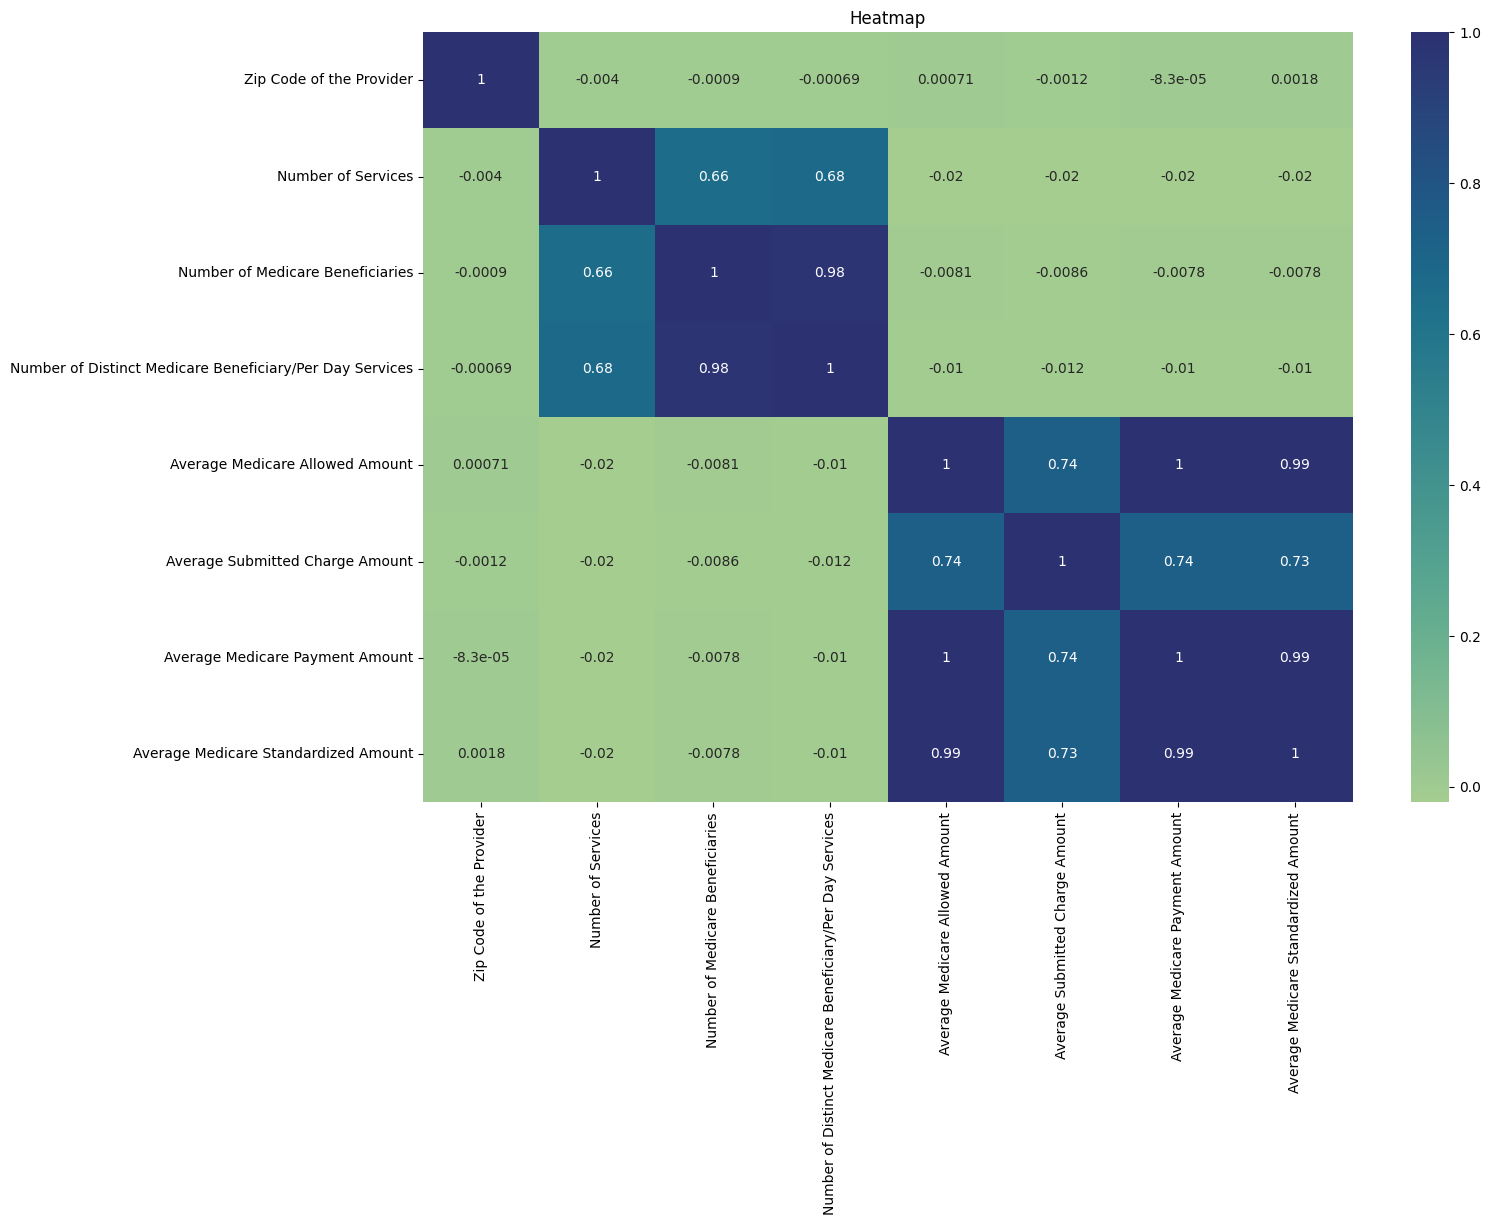

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True, cmap='crest')
plt.title('Heatmap')

<div class="alert alert-block alert-warning">
<b>Insights: </b>The 'Average Medicare Allowed Amount' and 'Average Medicare Payment Amount' shows a very strong correlation having value=1, suggesting that higher allowed amounts tend to result in higher payments.
</div>

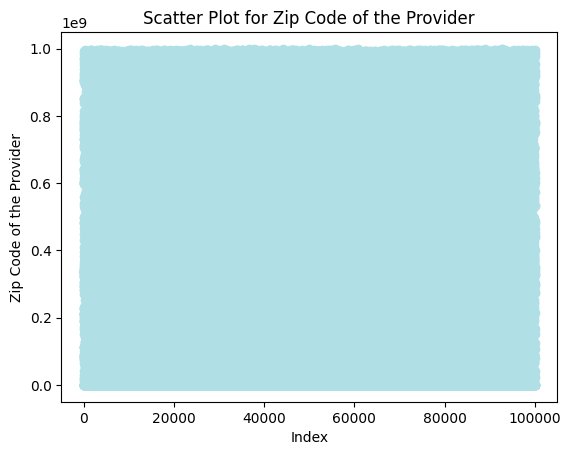

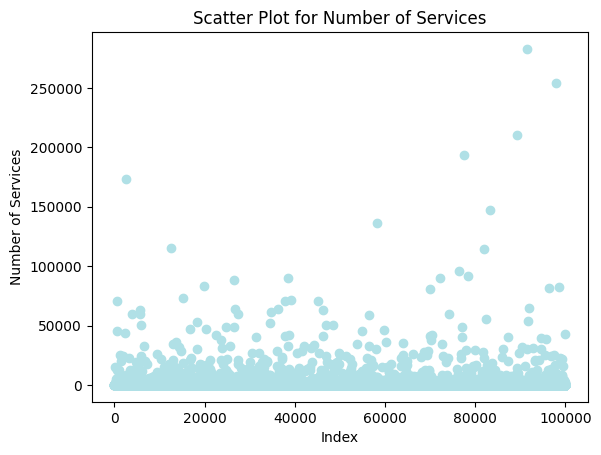

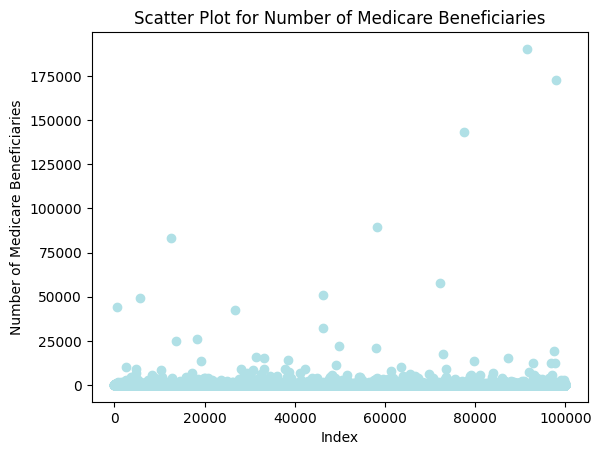

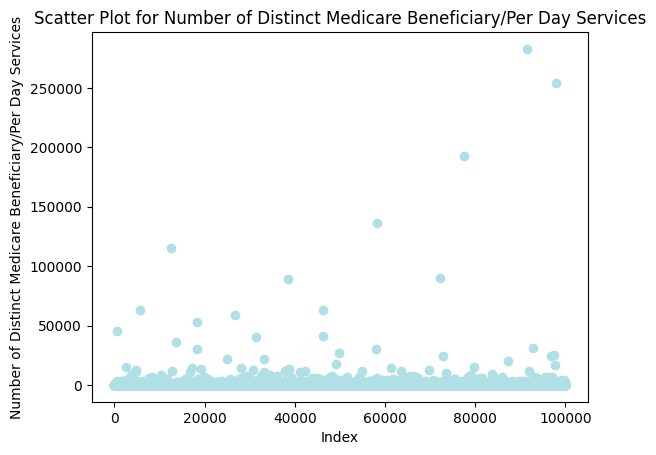

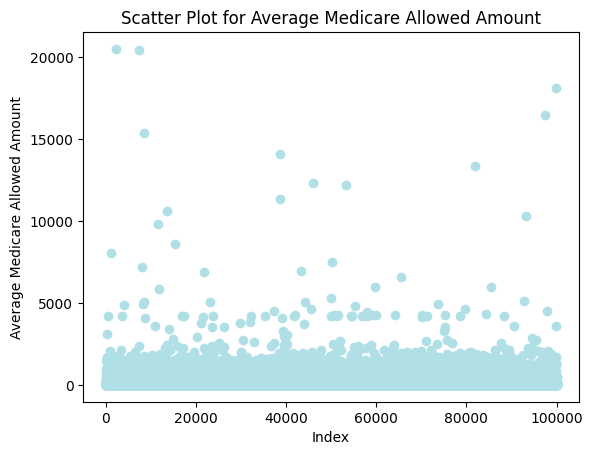

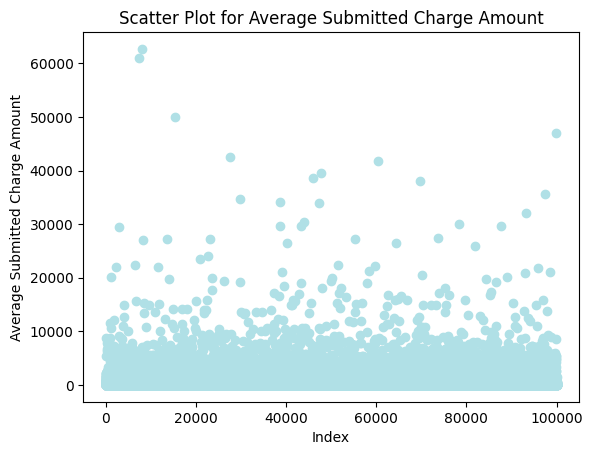

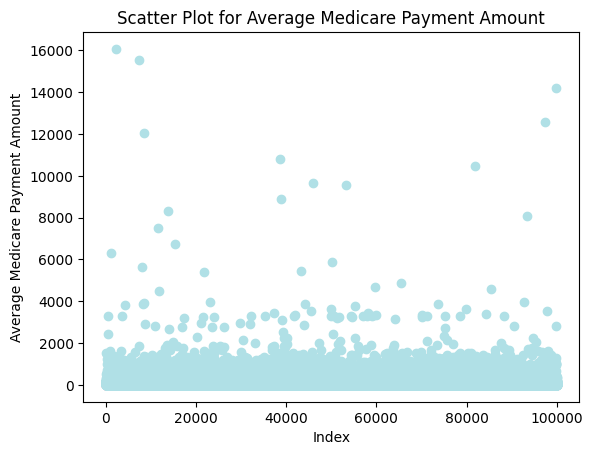

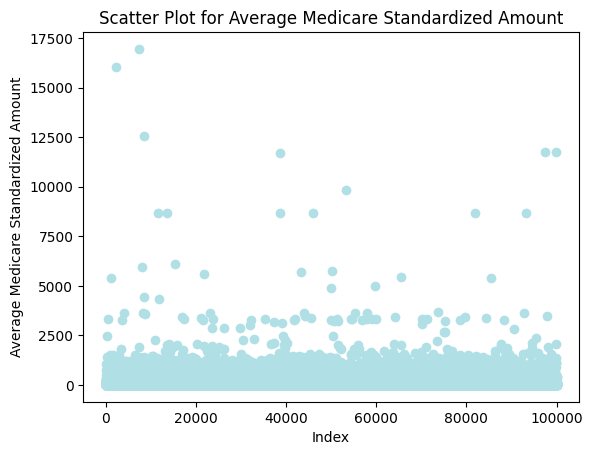

In [87]:
numerical_cols = df.select_dtypes(include=[np.number])

for col in numerical_cols.columns:
    plt.figure()
    plt.scatter(df.index, df[col], c='powderblue')
    plt.title(f"Scatter Plot for {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    
plt.show()

<div class="alert alert-block alert-danger">
<b>Observation: </b> The 'Zip Code of the Provider' column has uniform distribution so it can be dropped while training the model for detecting outliers.
</div>

In [91]:
# Dropping Zip Code
df.drop(columns=['Zip Code of the Provider'], inplace=True)

### Box Plot Representation

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Number of Services'),
  Text(1, 0, 'Number of Medicare Beneficiaries'),
  Text(2, 0, 'Number of Distinct Medicare Beneficiary/Per Day Services'),
  Text(3, 0, 'Average Medicare Allowed Amount'),
  Text(4, 0, 'Average Submitted Charge Amount'),
  Text(5, 0, 'Average Medicare Payment Amount'),
  Text(6, 0, 'Average Medicare Standardized Amount')])

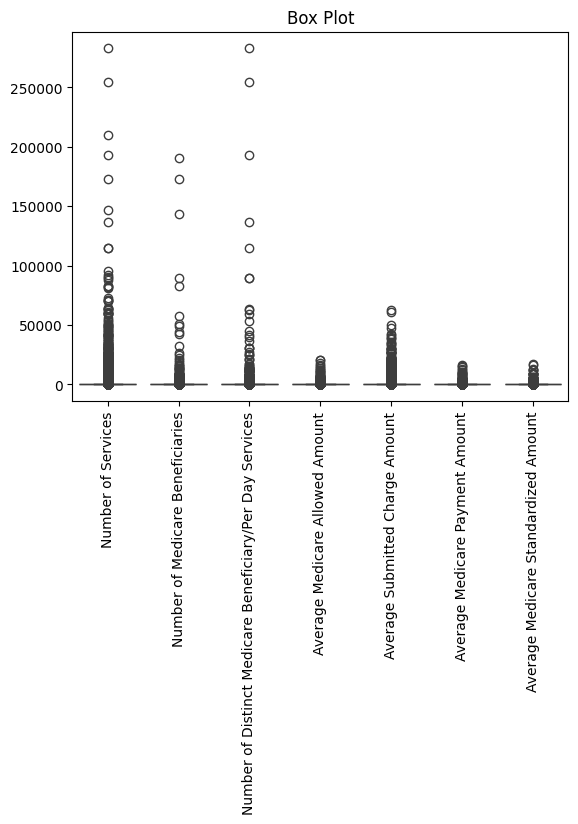

In [95]:
sns.boxplot(data=df)
plt.title('Box Plot')
plt.xticks(rotation=90)

<div class="alert alert-block alert-warning">
<b>Insights: </b> The columns 'Number of Services', 'Number of Medicare Beneficiaries', and 'Number of Distinct Medicare Beneficiary/Per Day Services' contains more number of outliers.

## Visualizing using AutoViz Library
### Univariate and Bivariate Analysis

Shape of your Data Set loaded: (99999, 19)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  4
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    19 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 1 du

Number of All Scatter Plots = 15


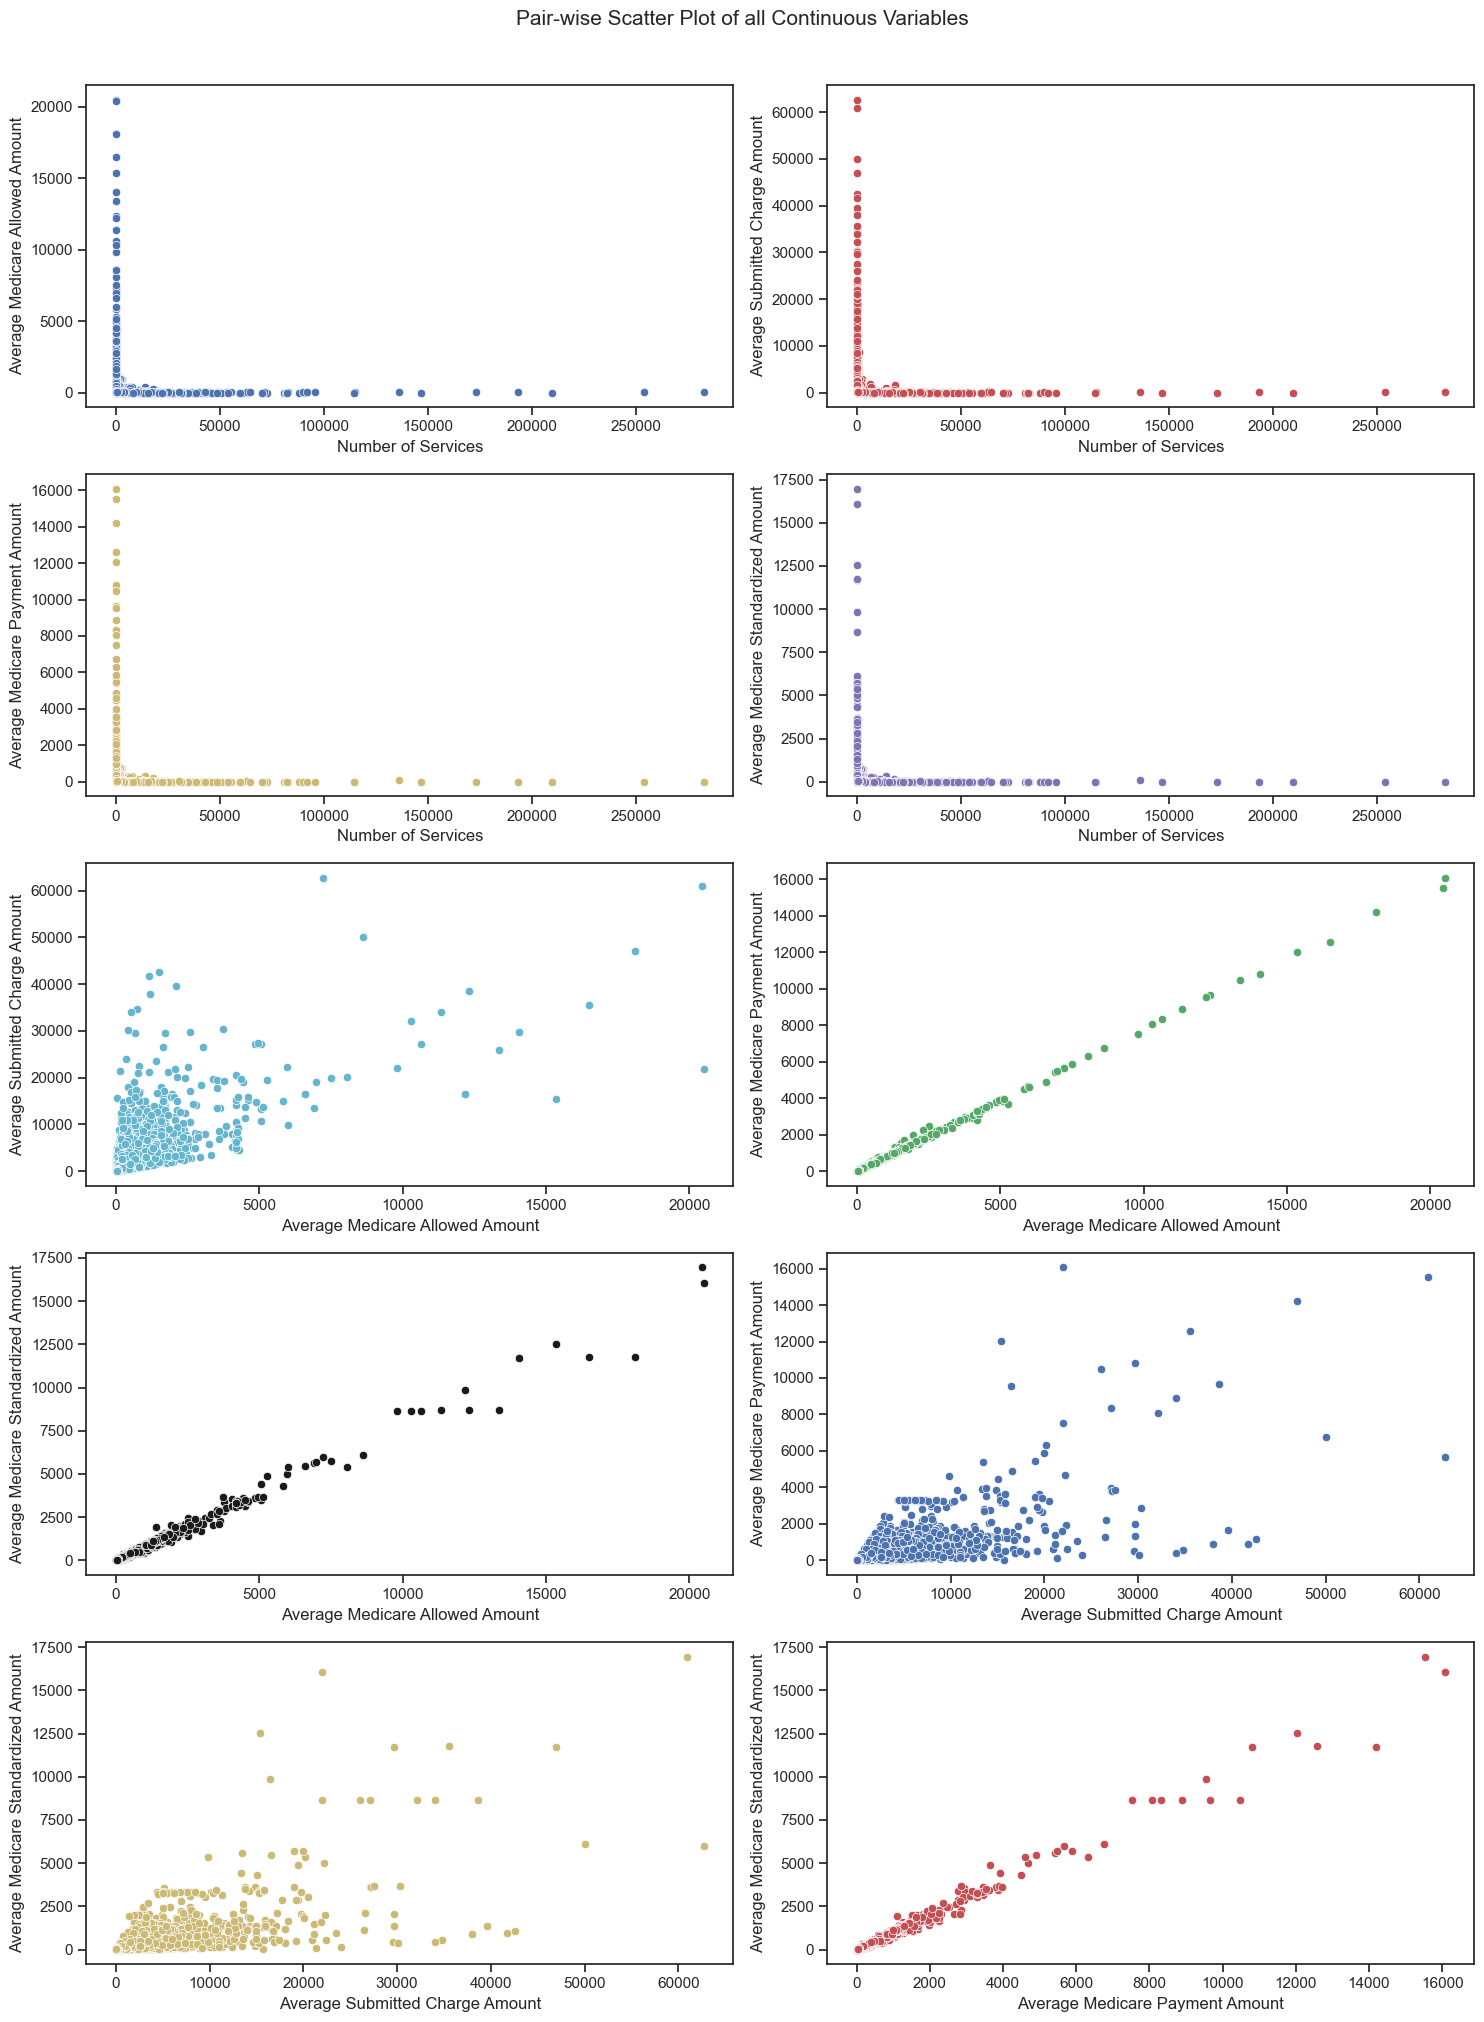

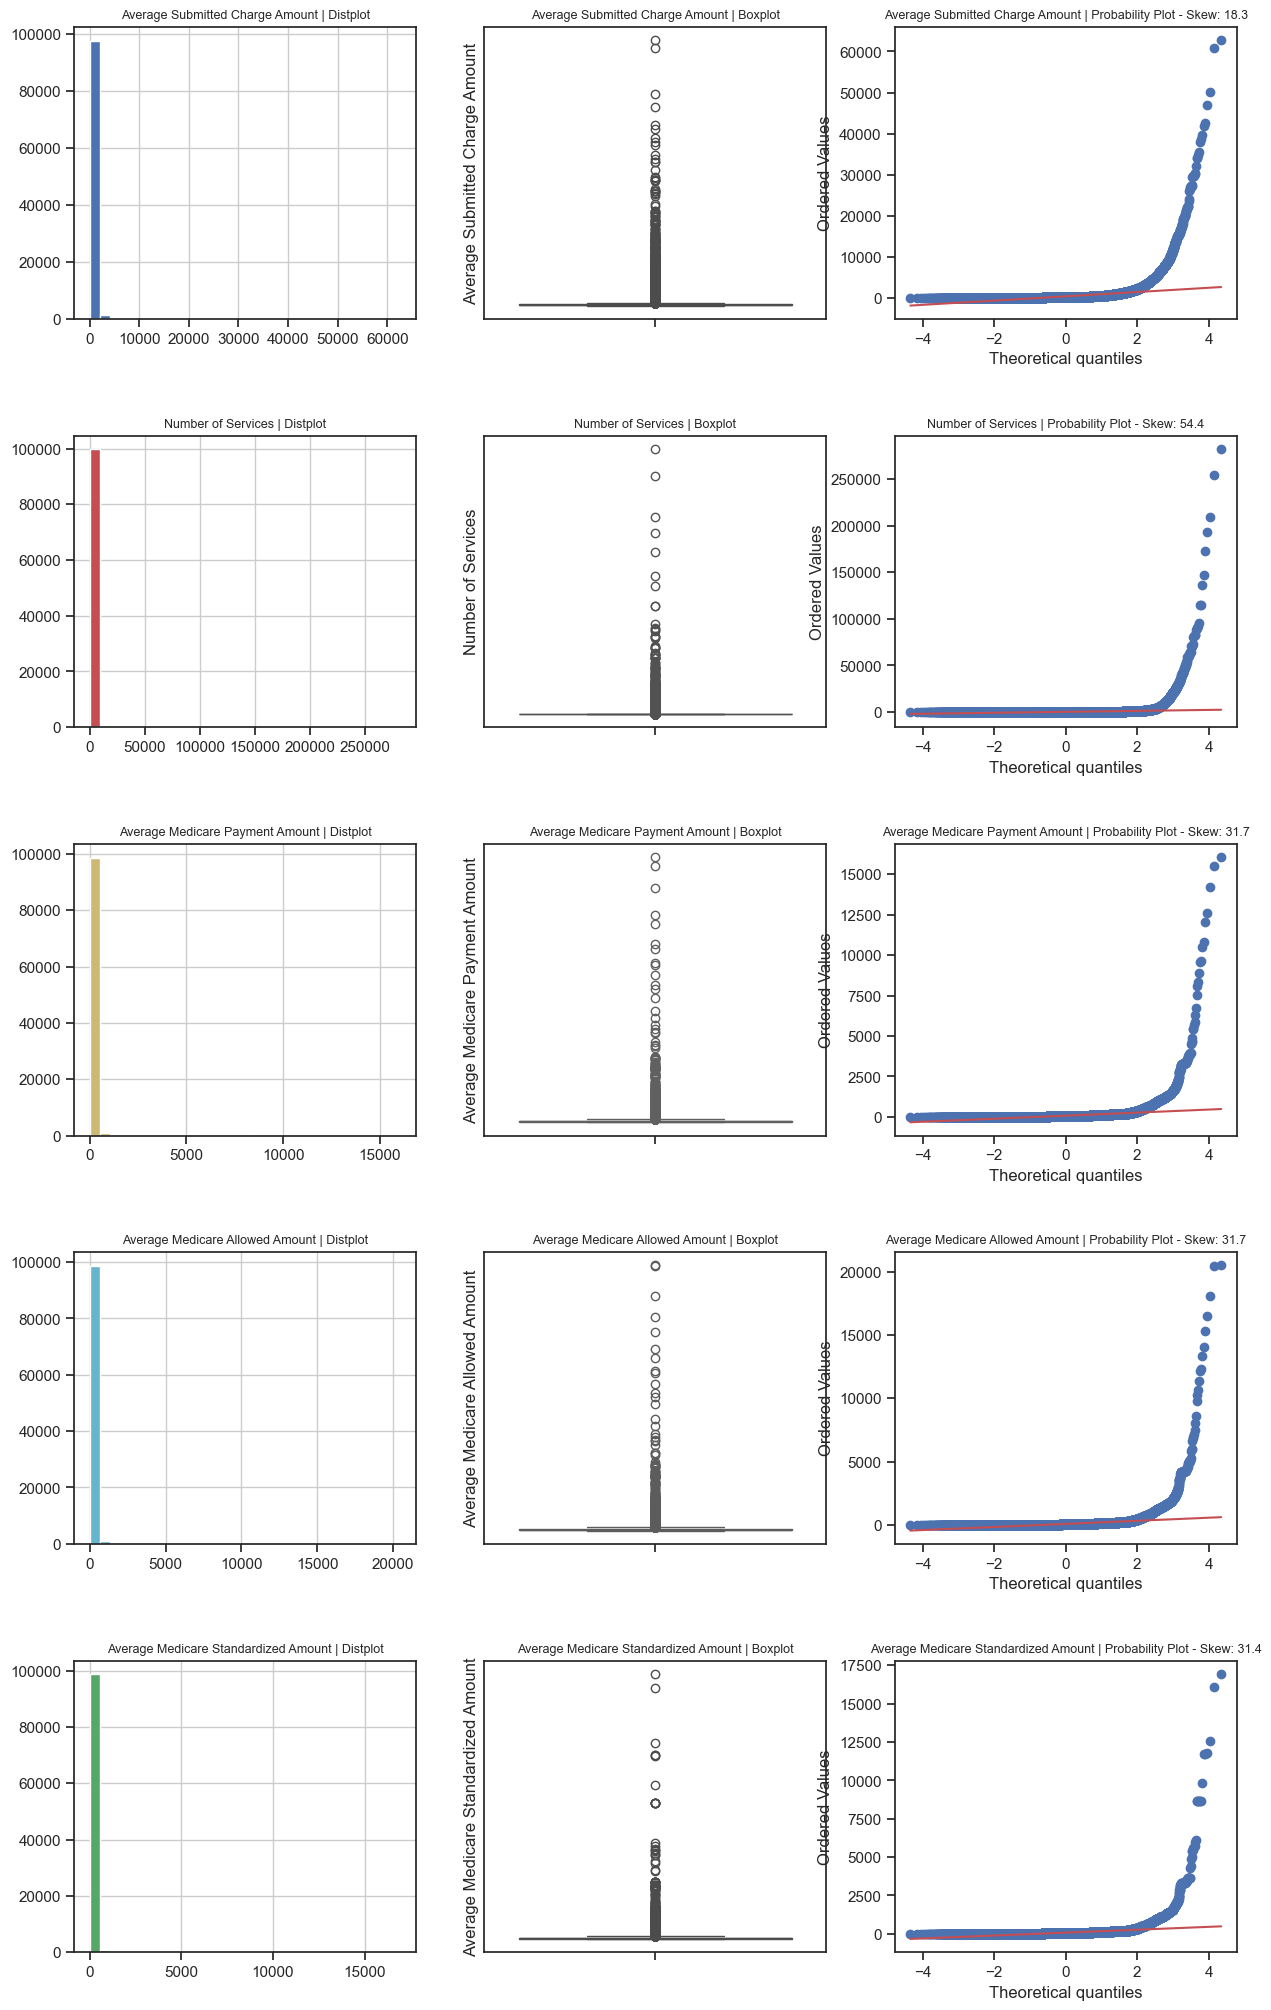

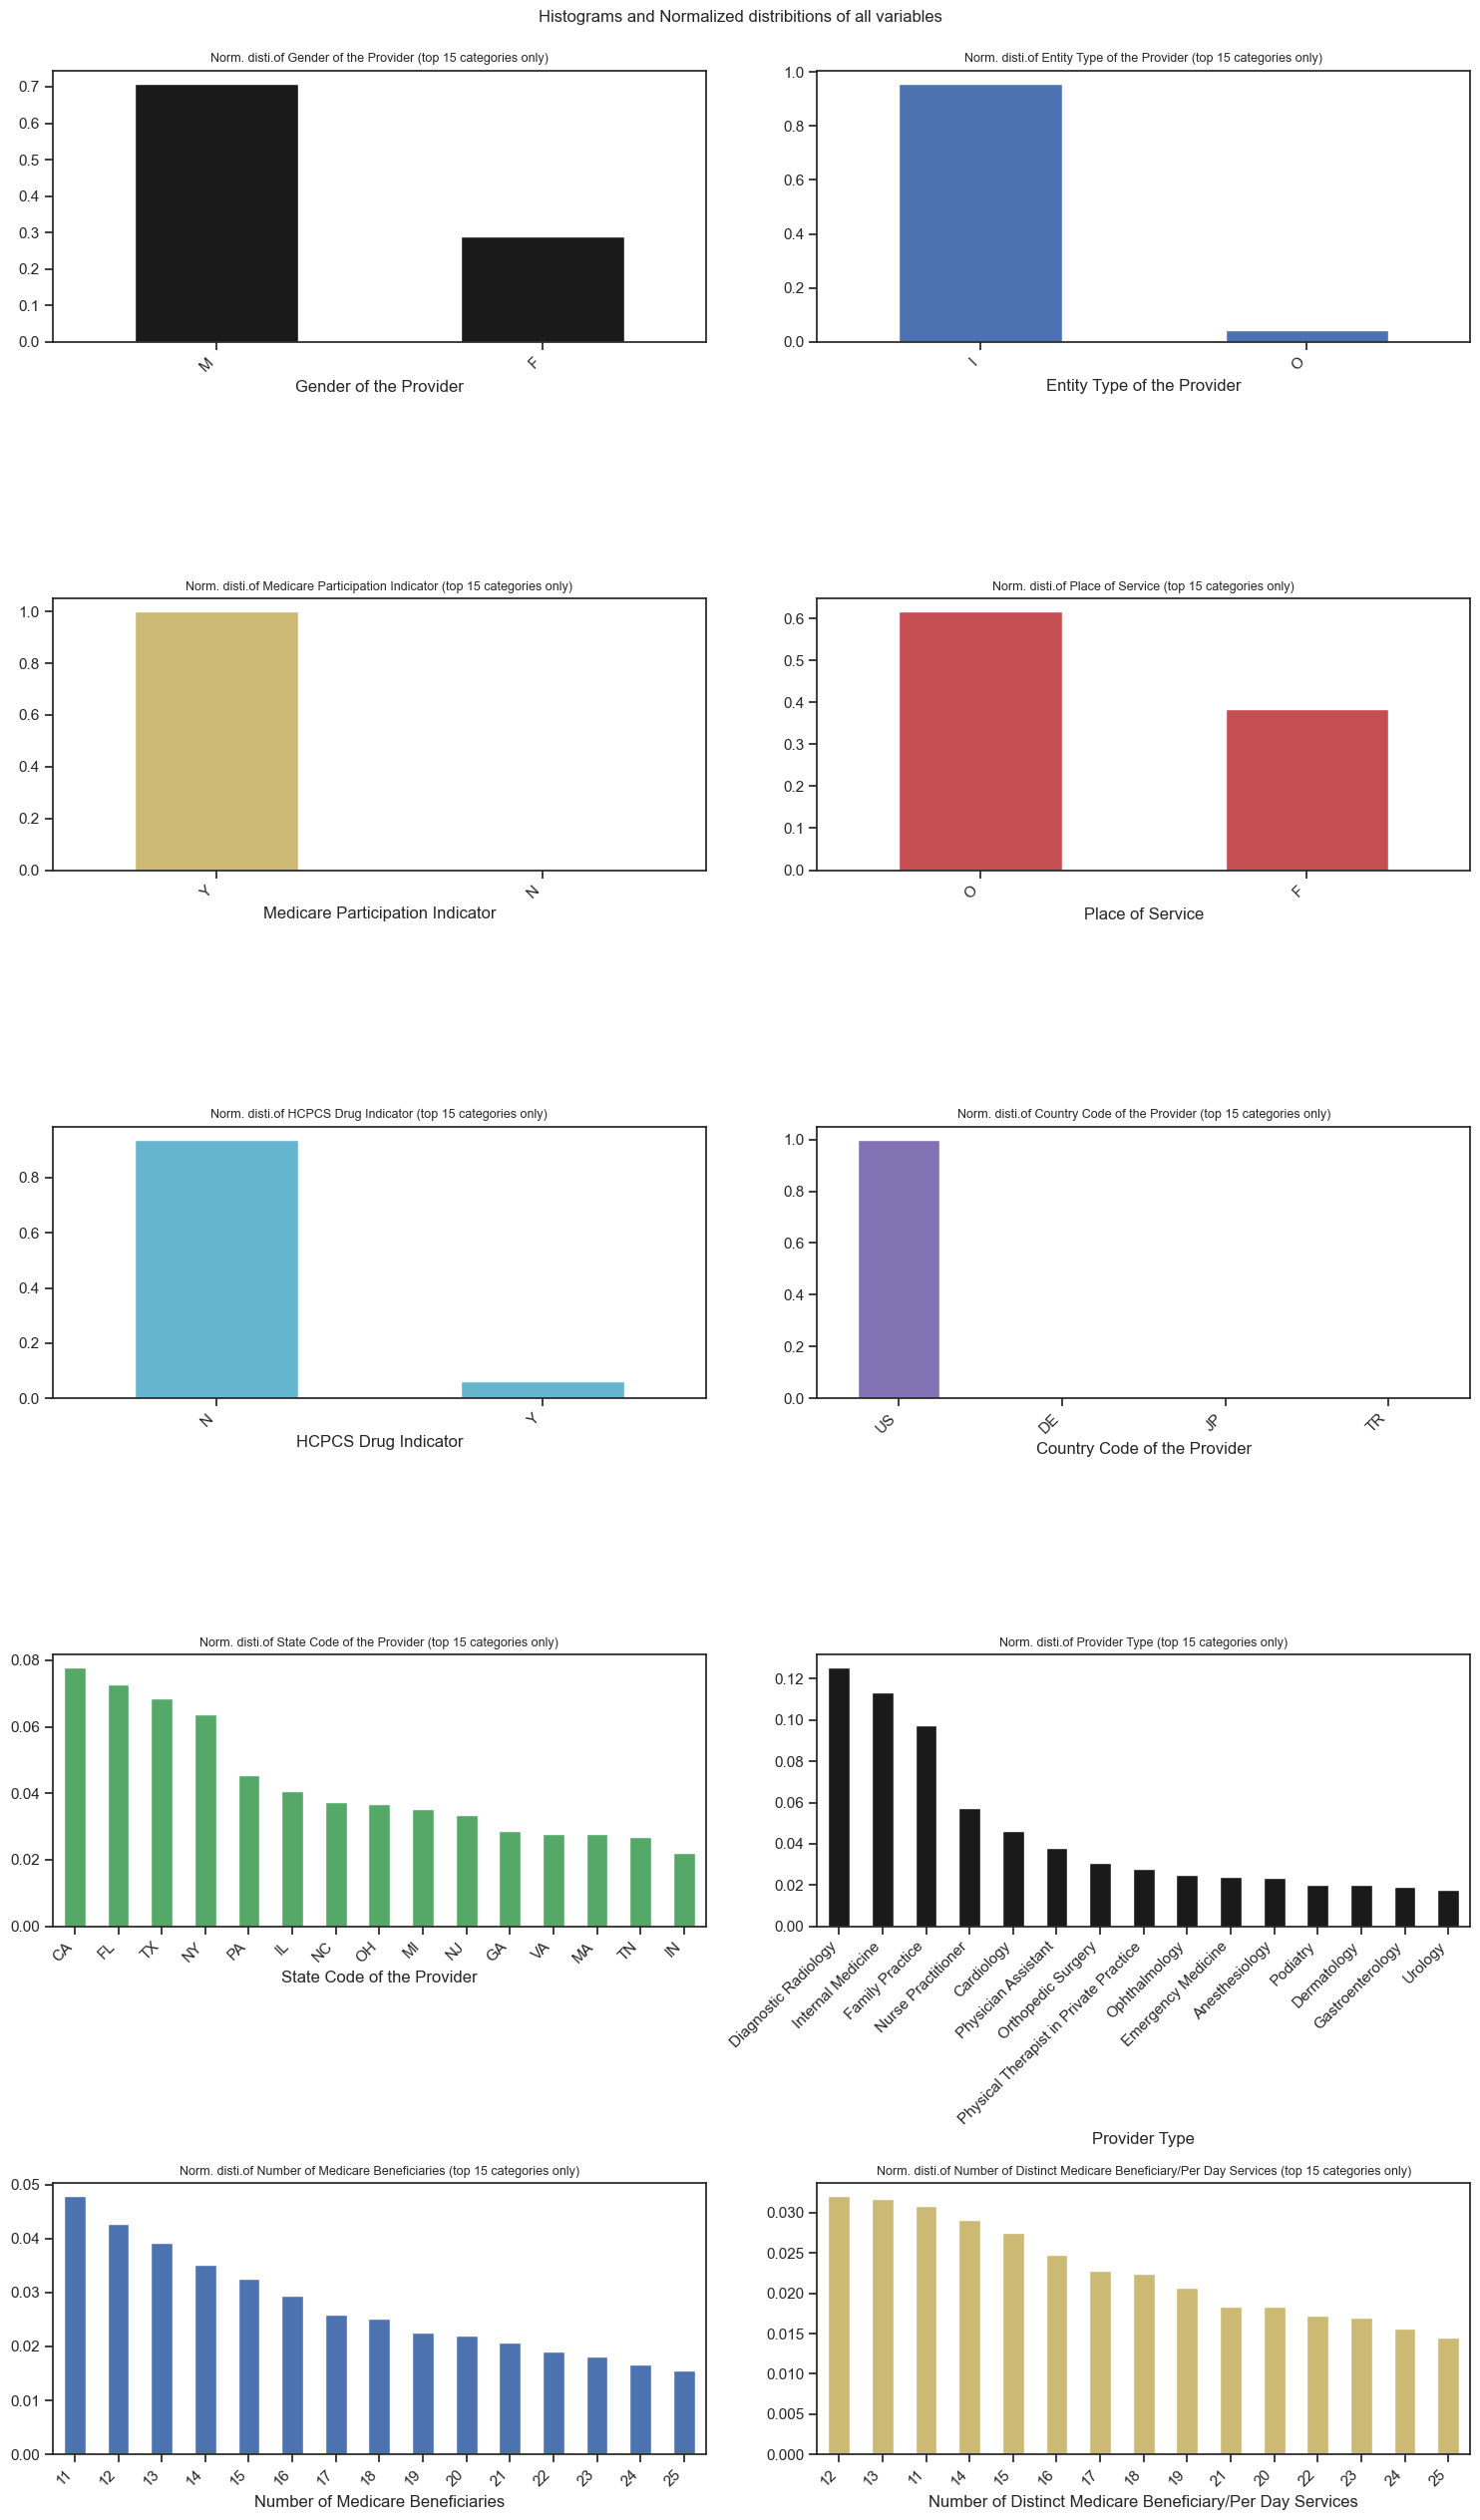

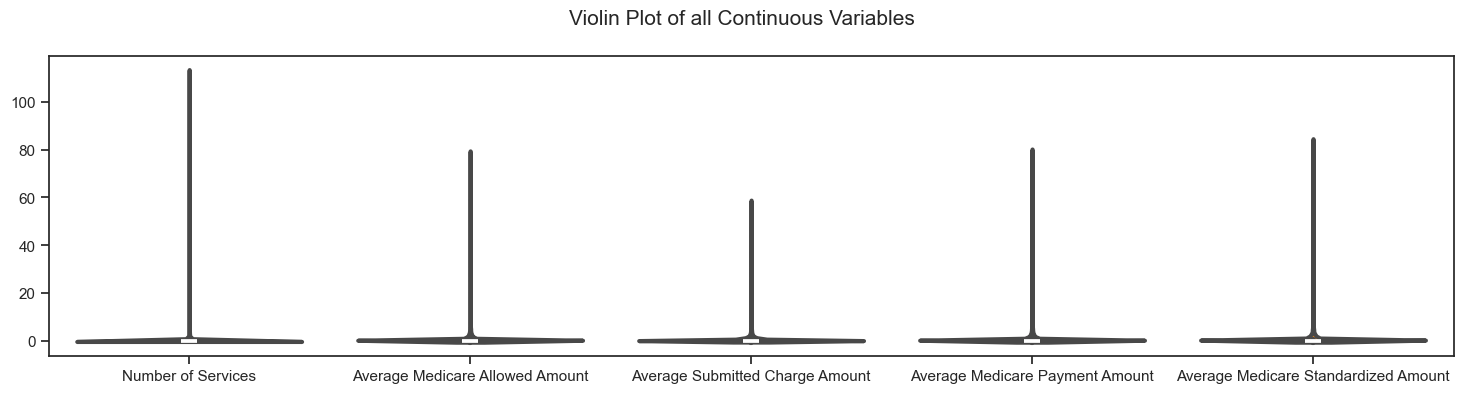

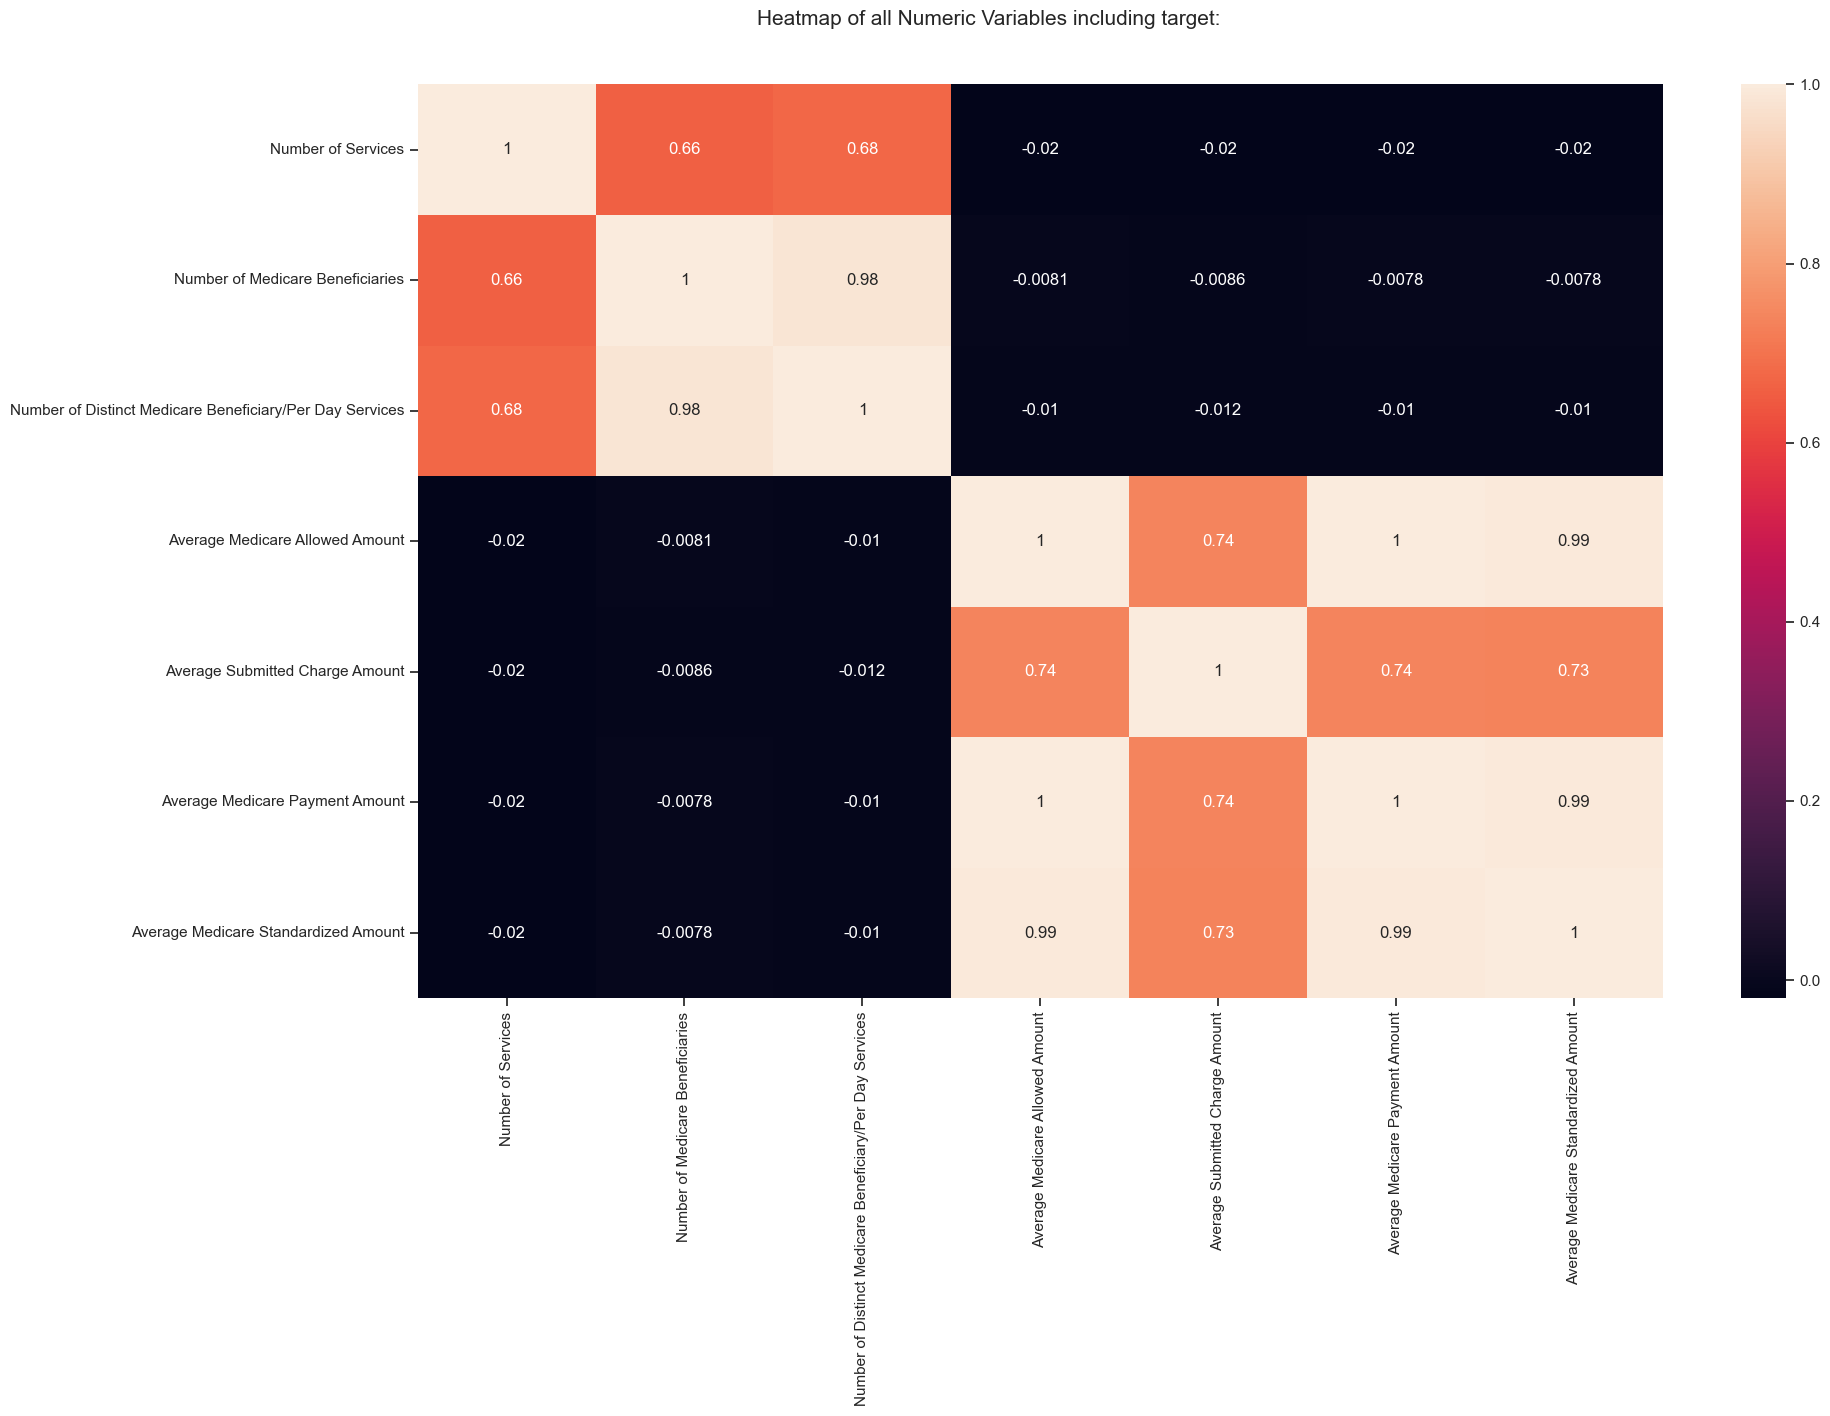

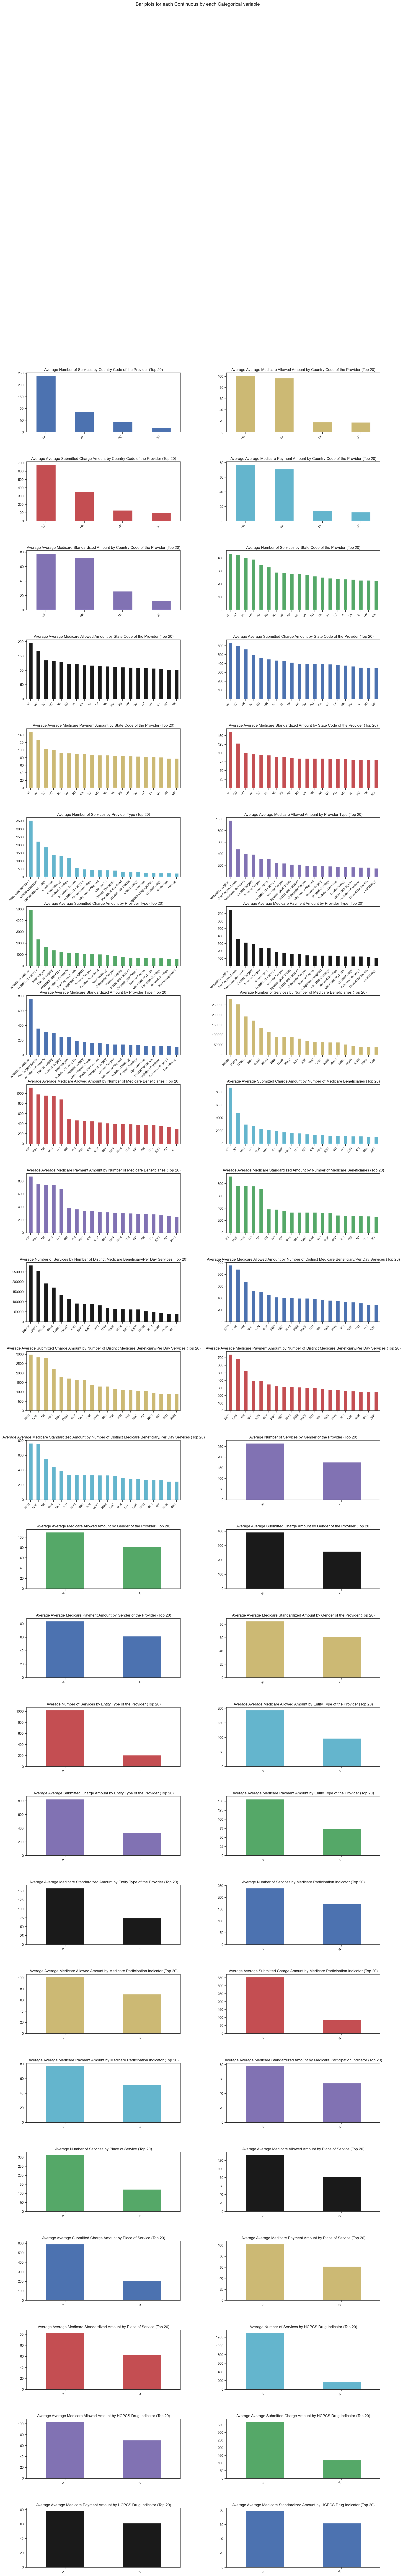

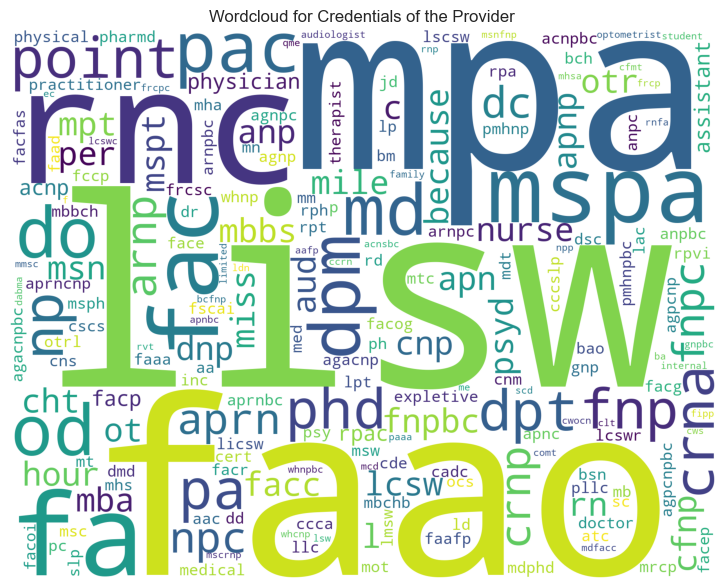

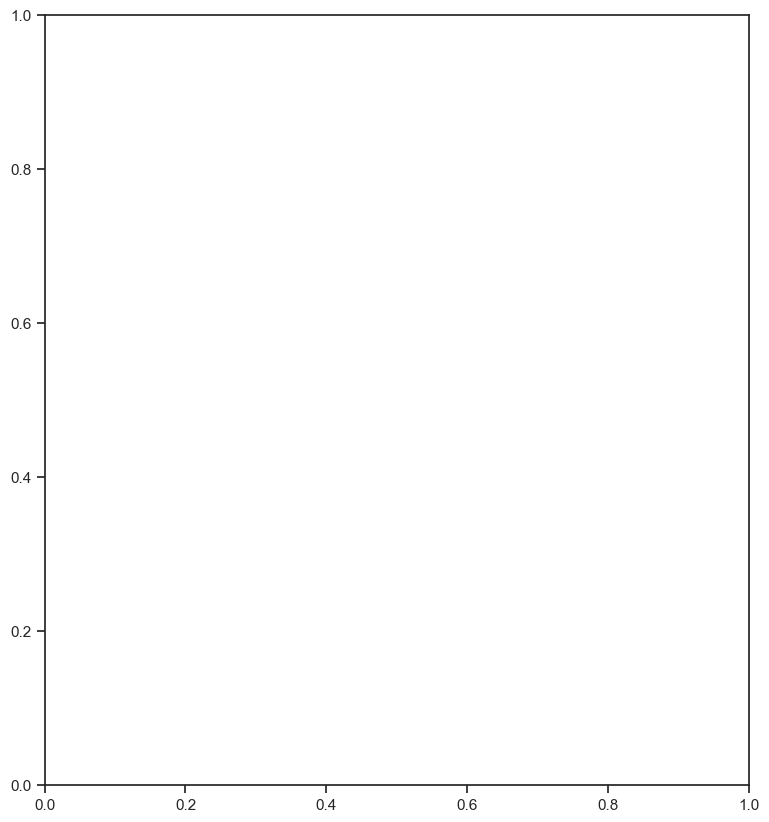

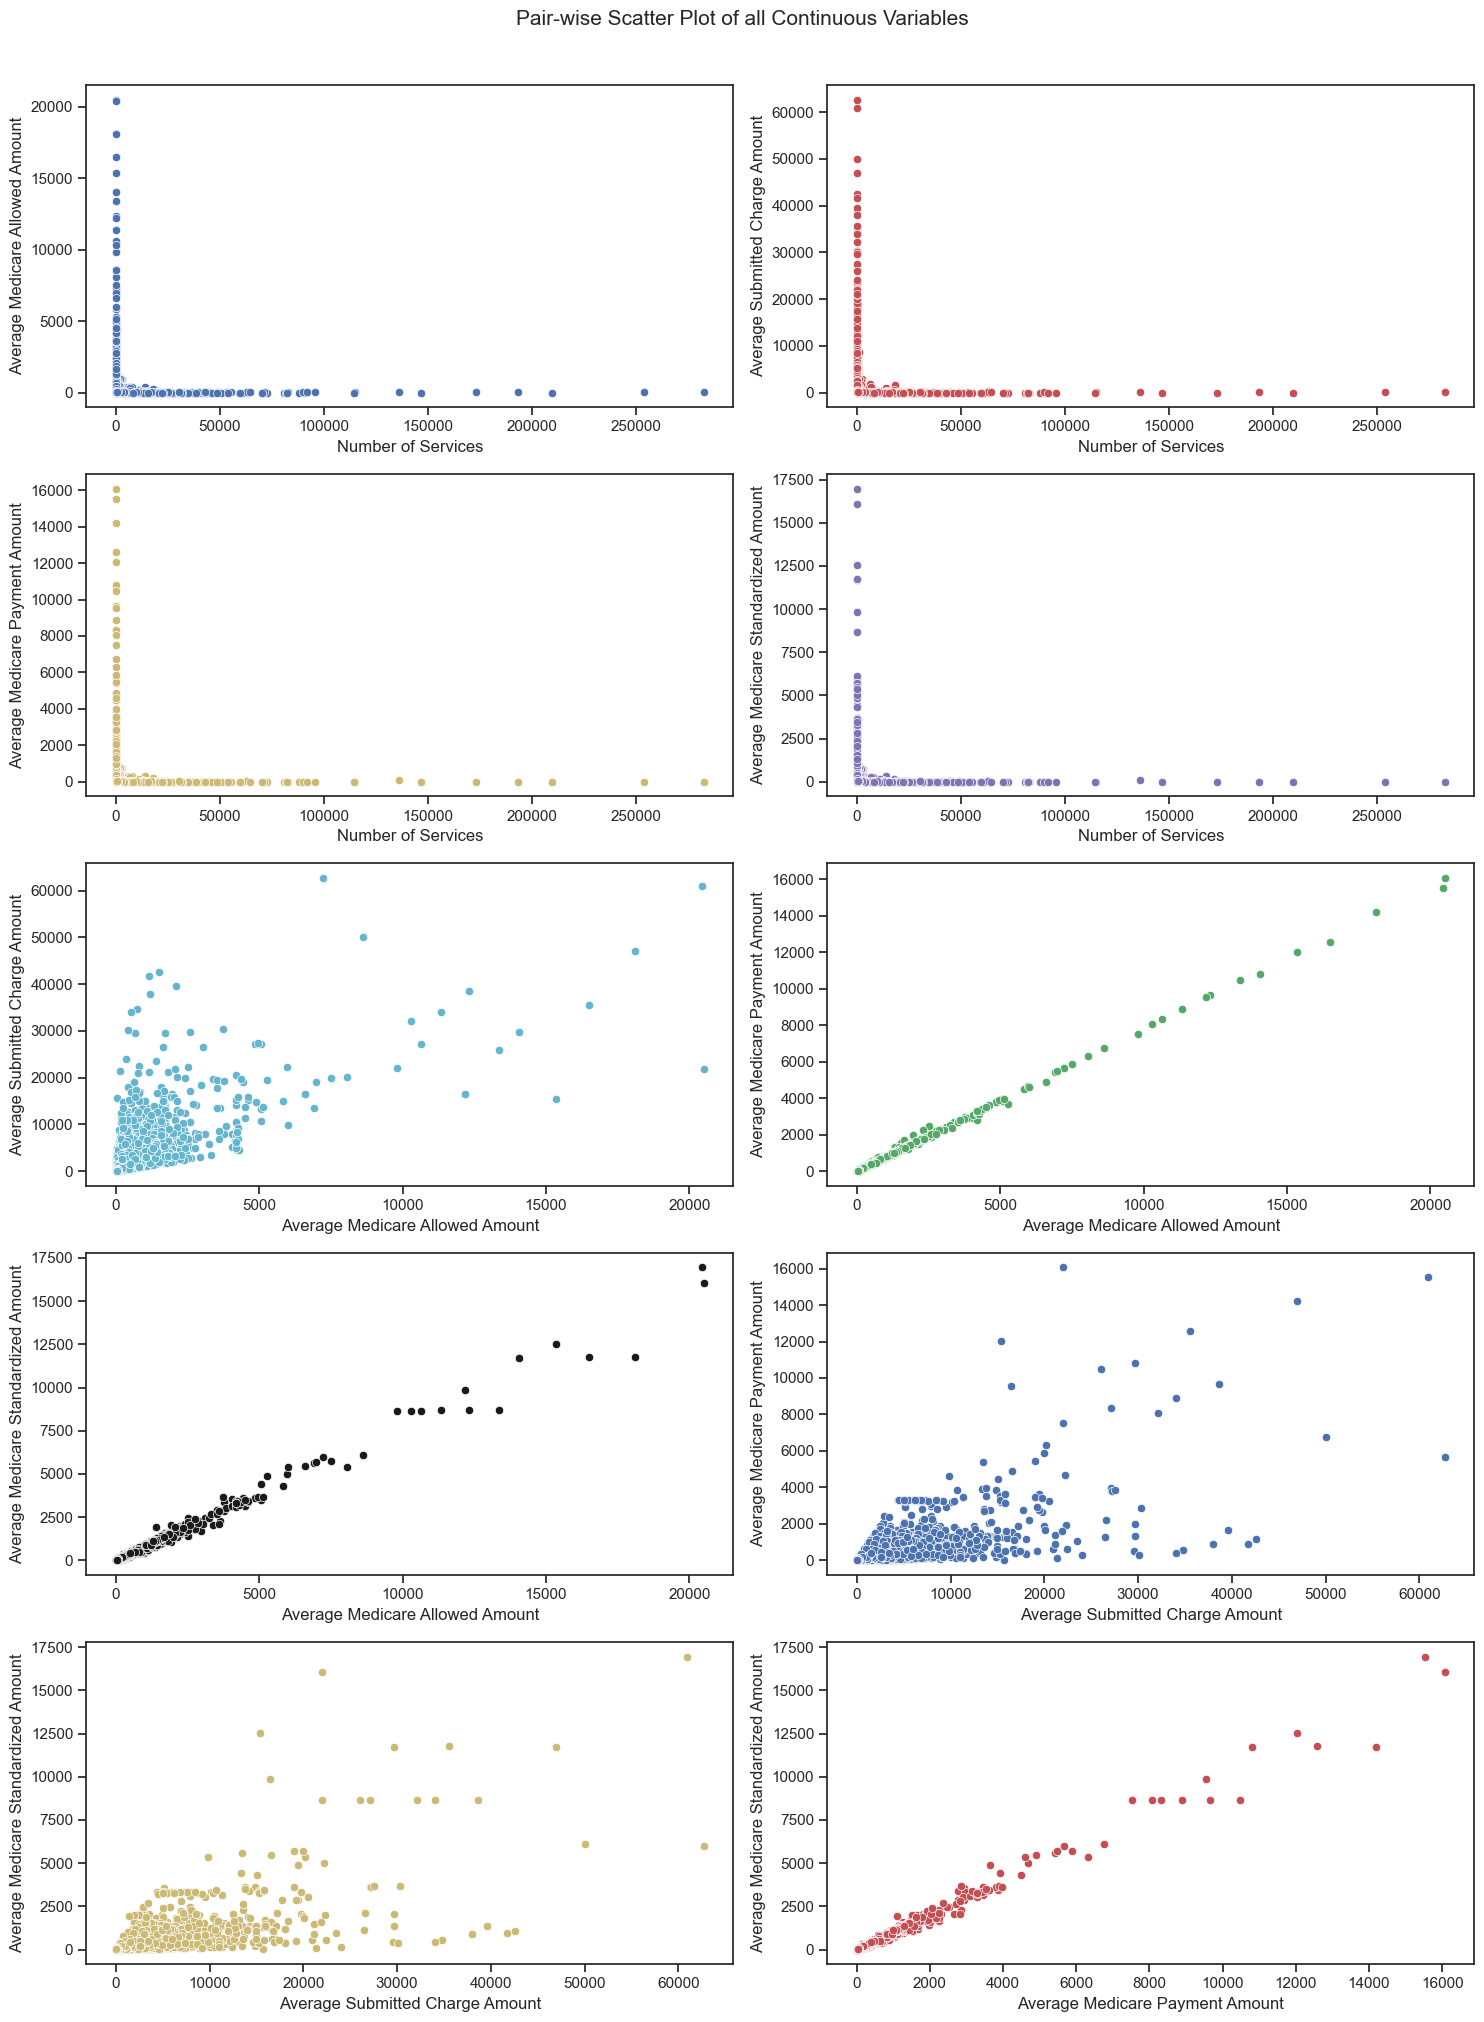

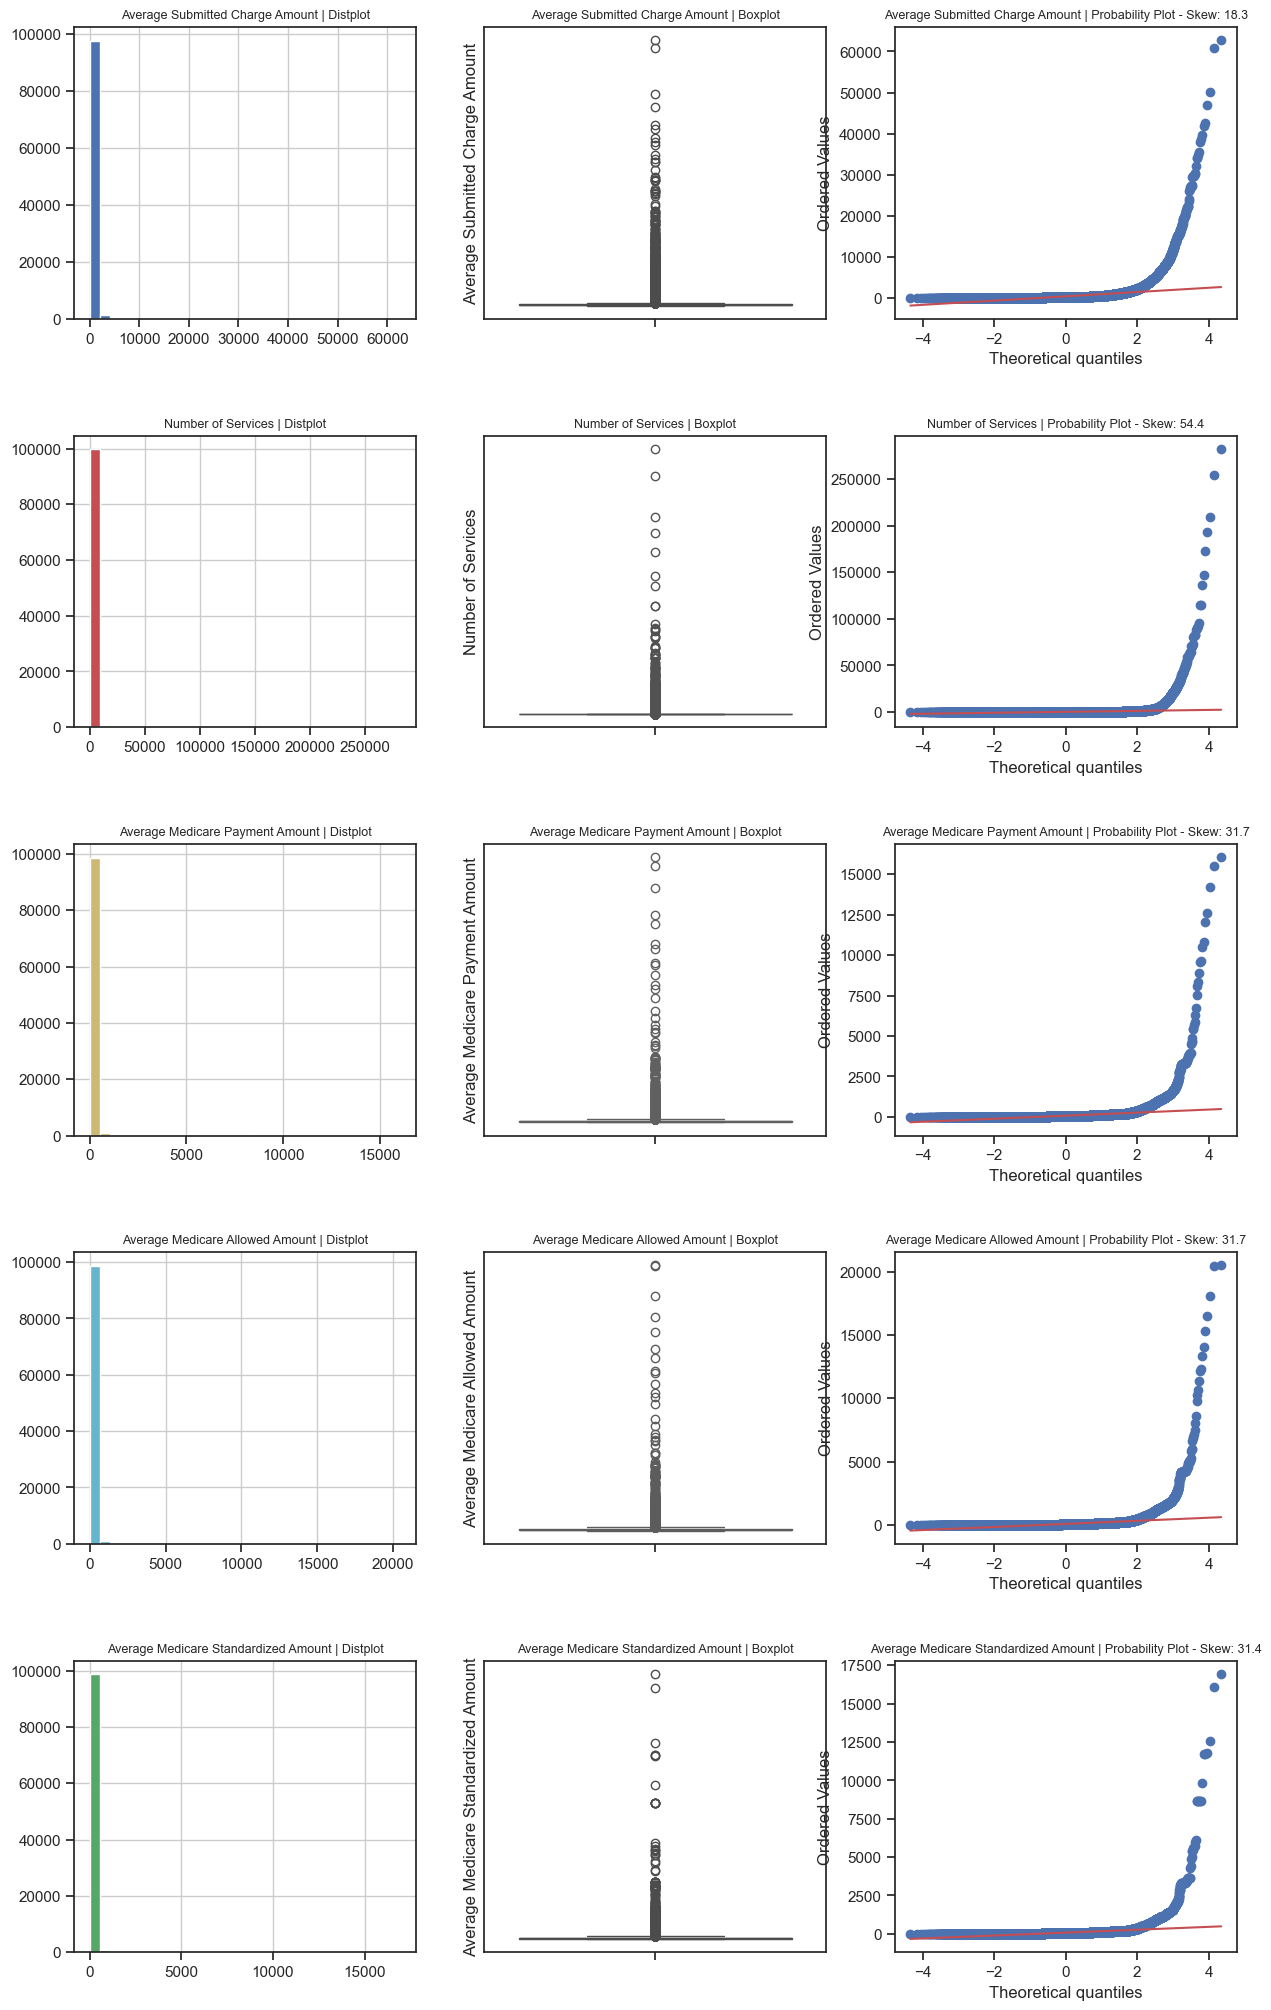

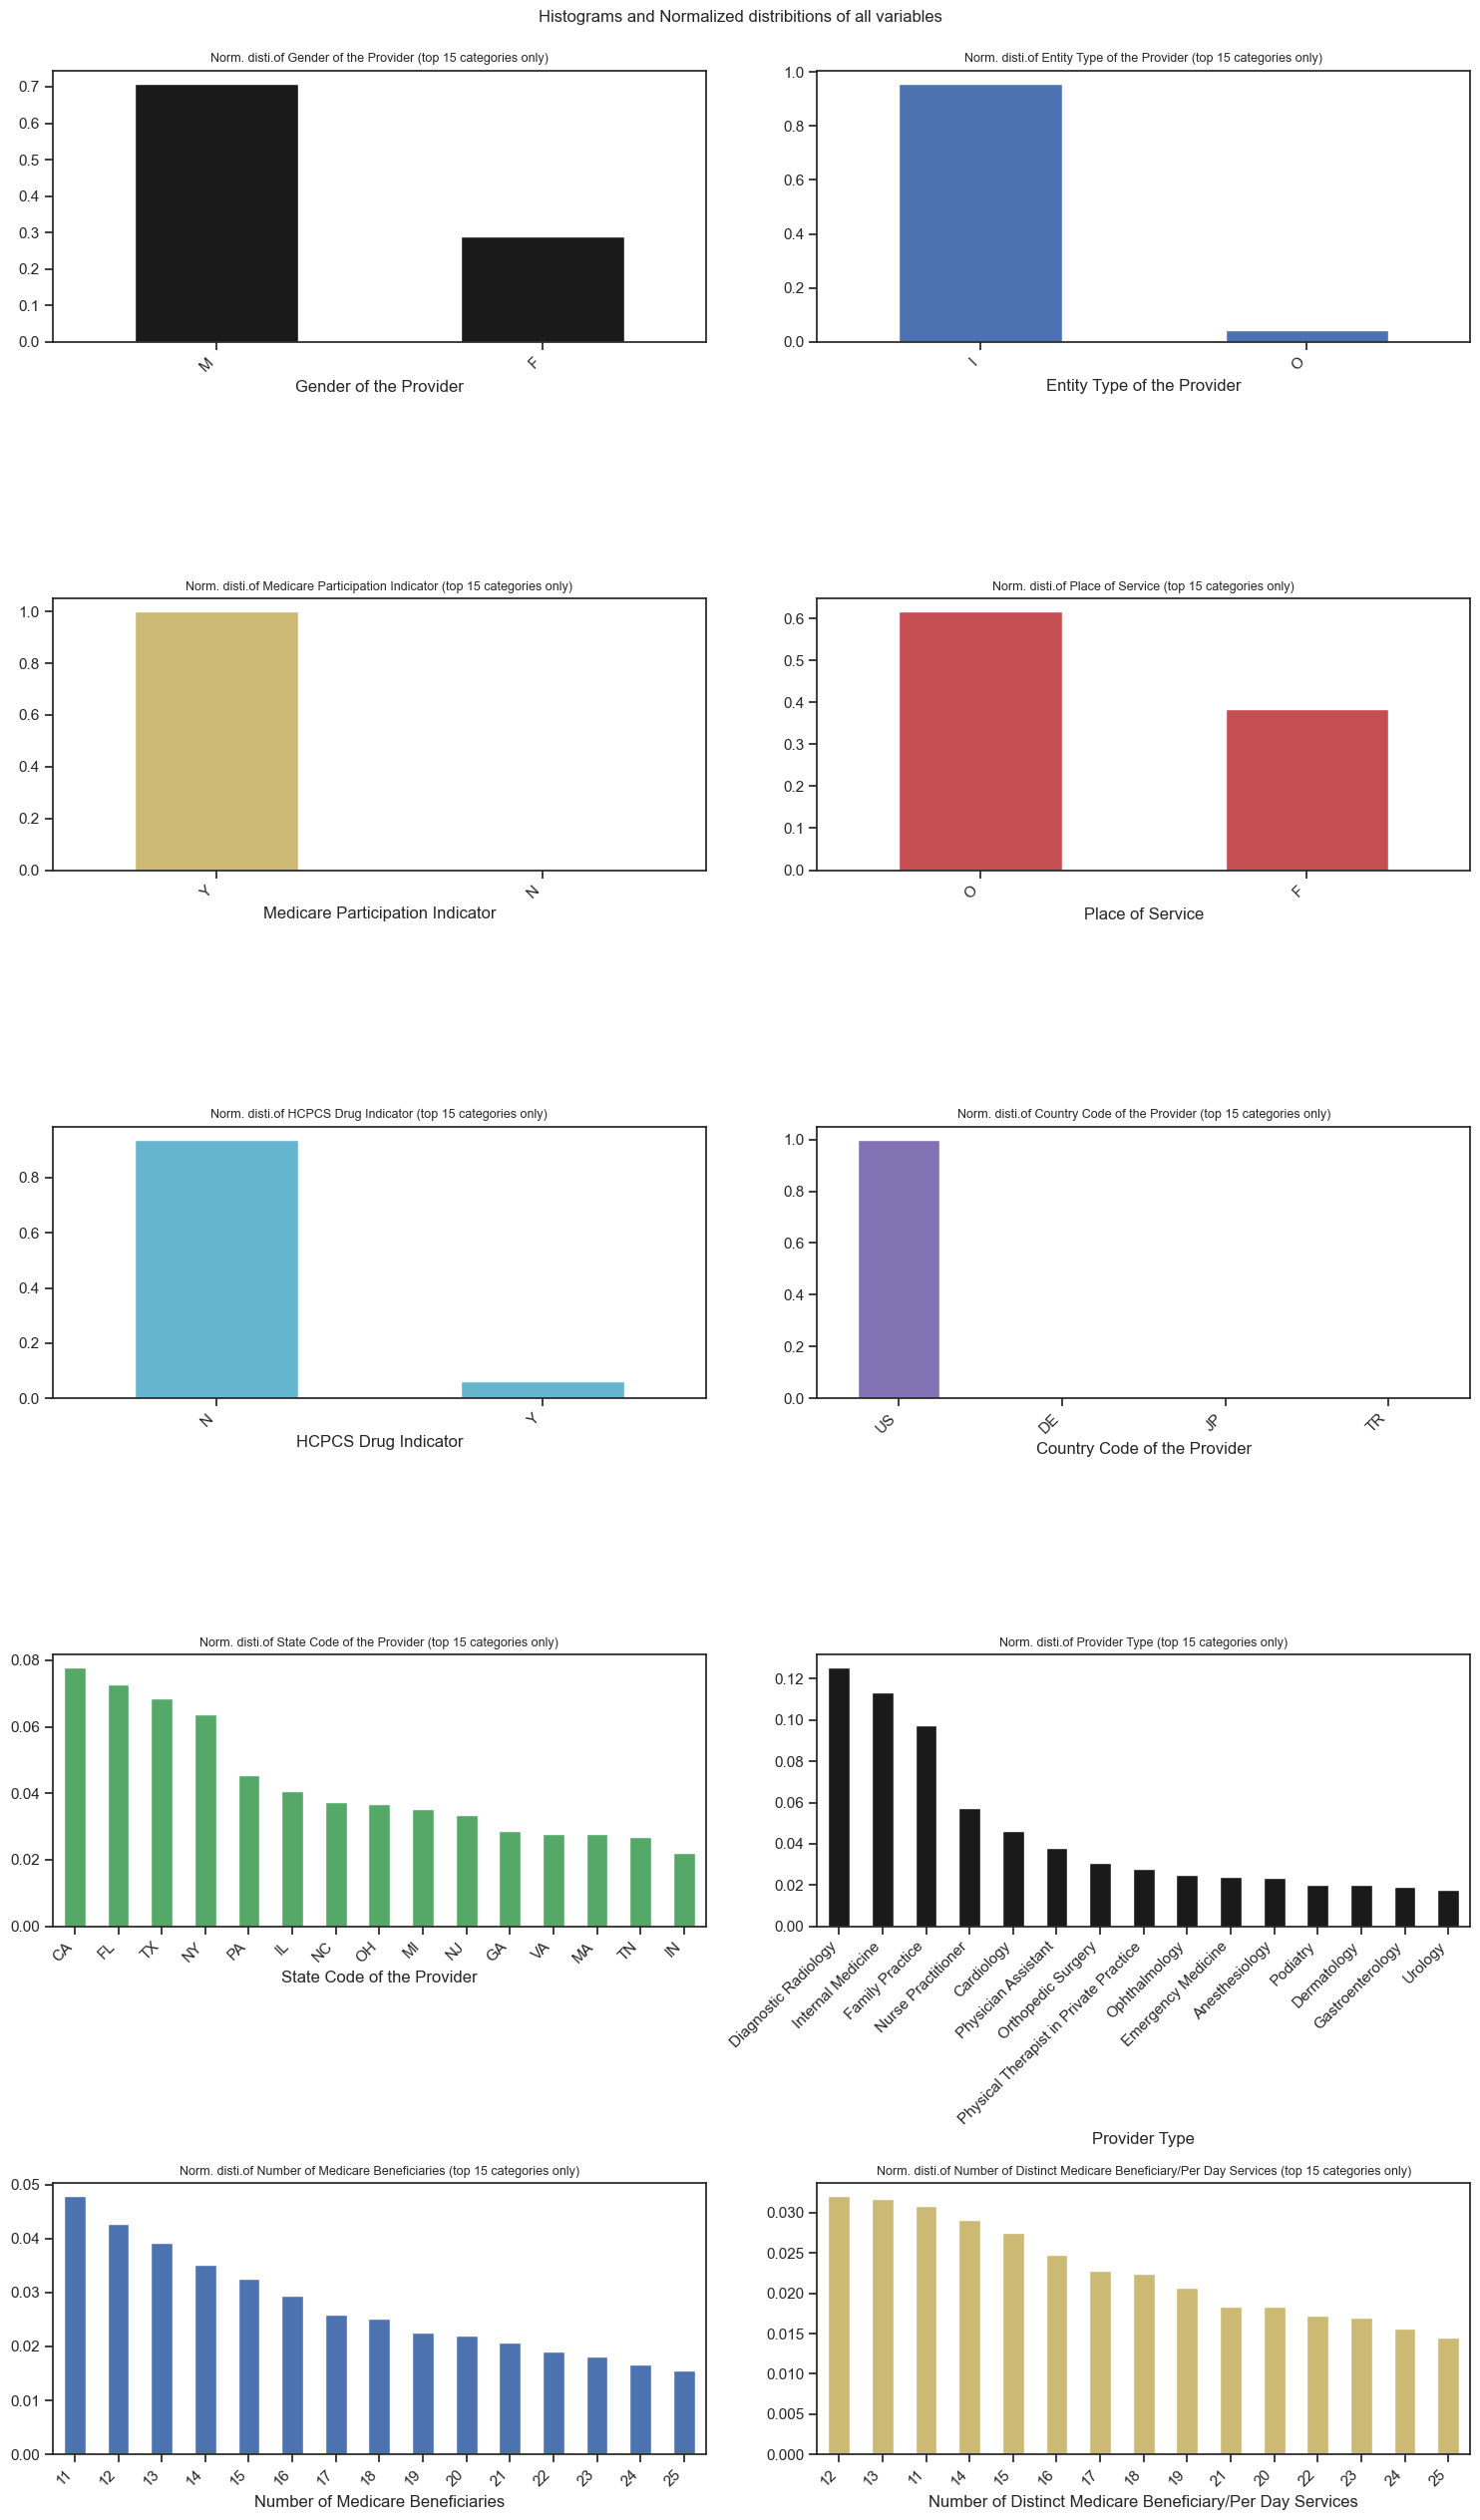

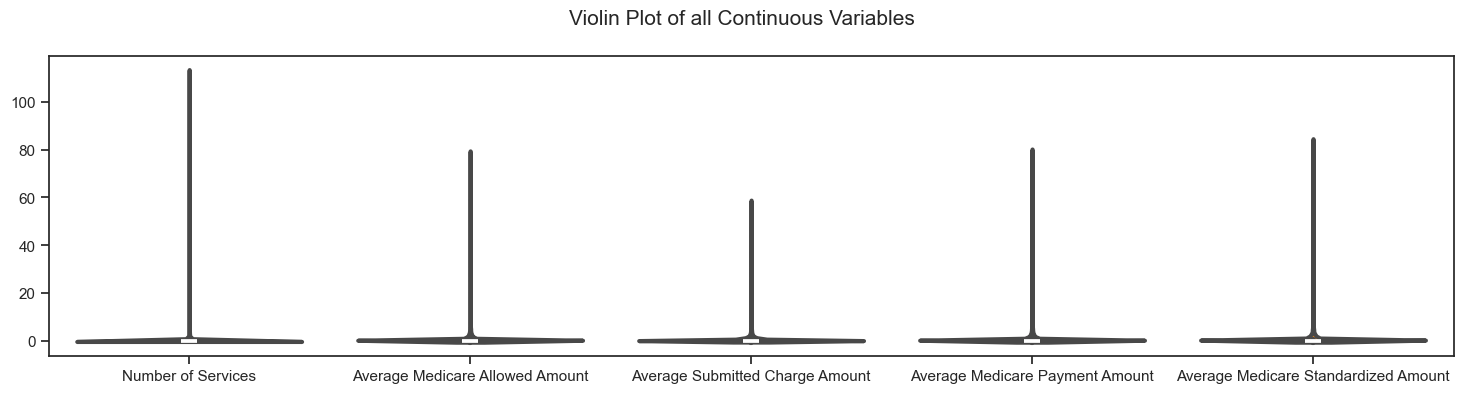

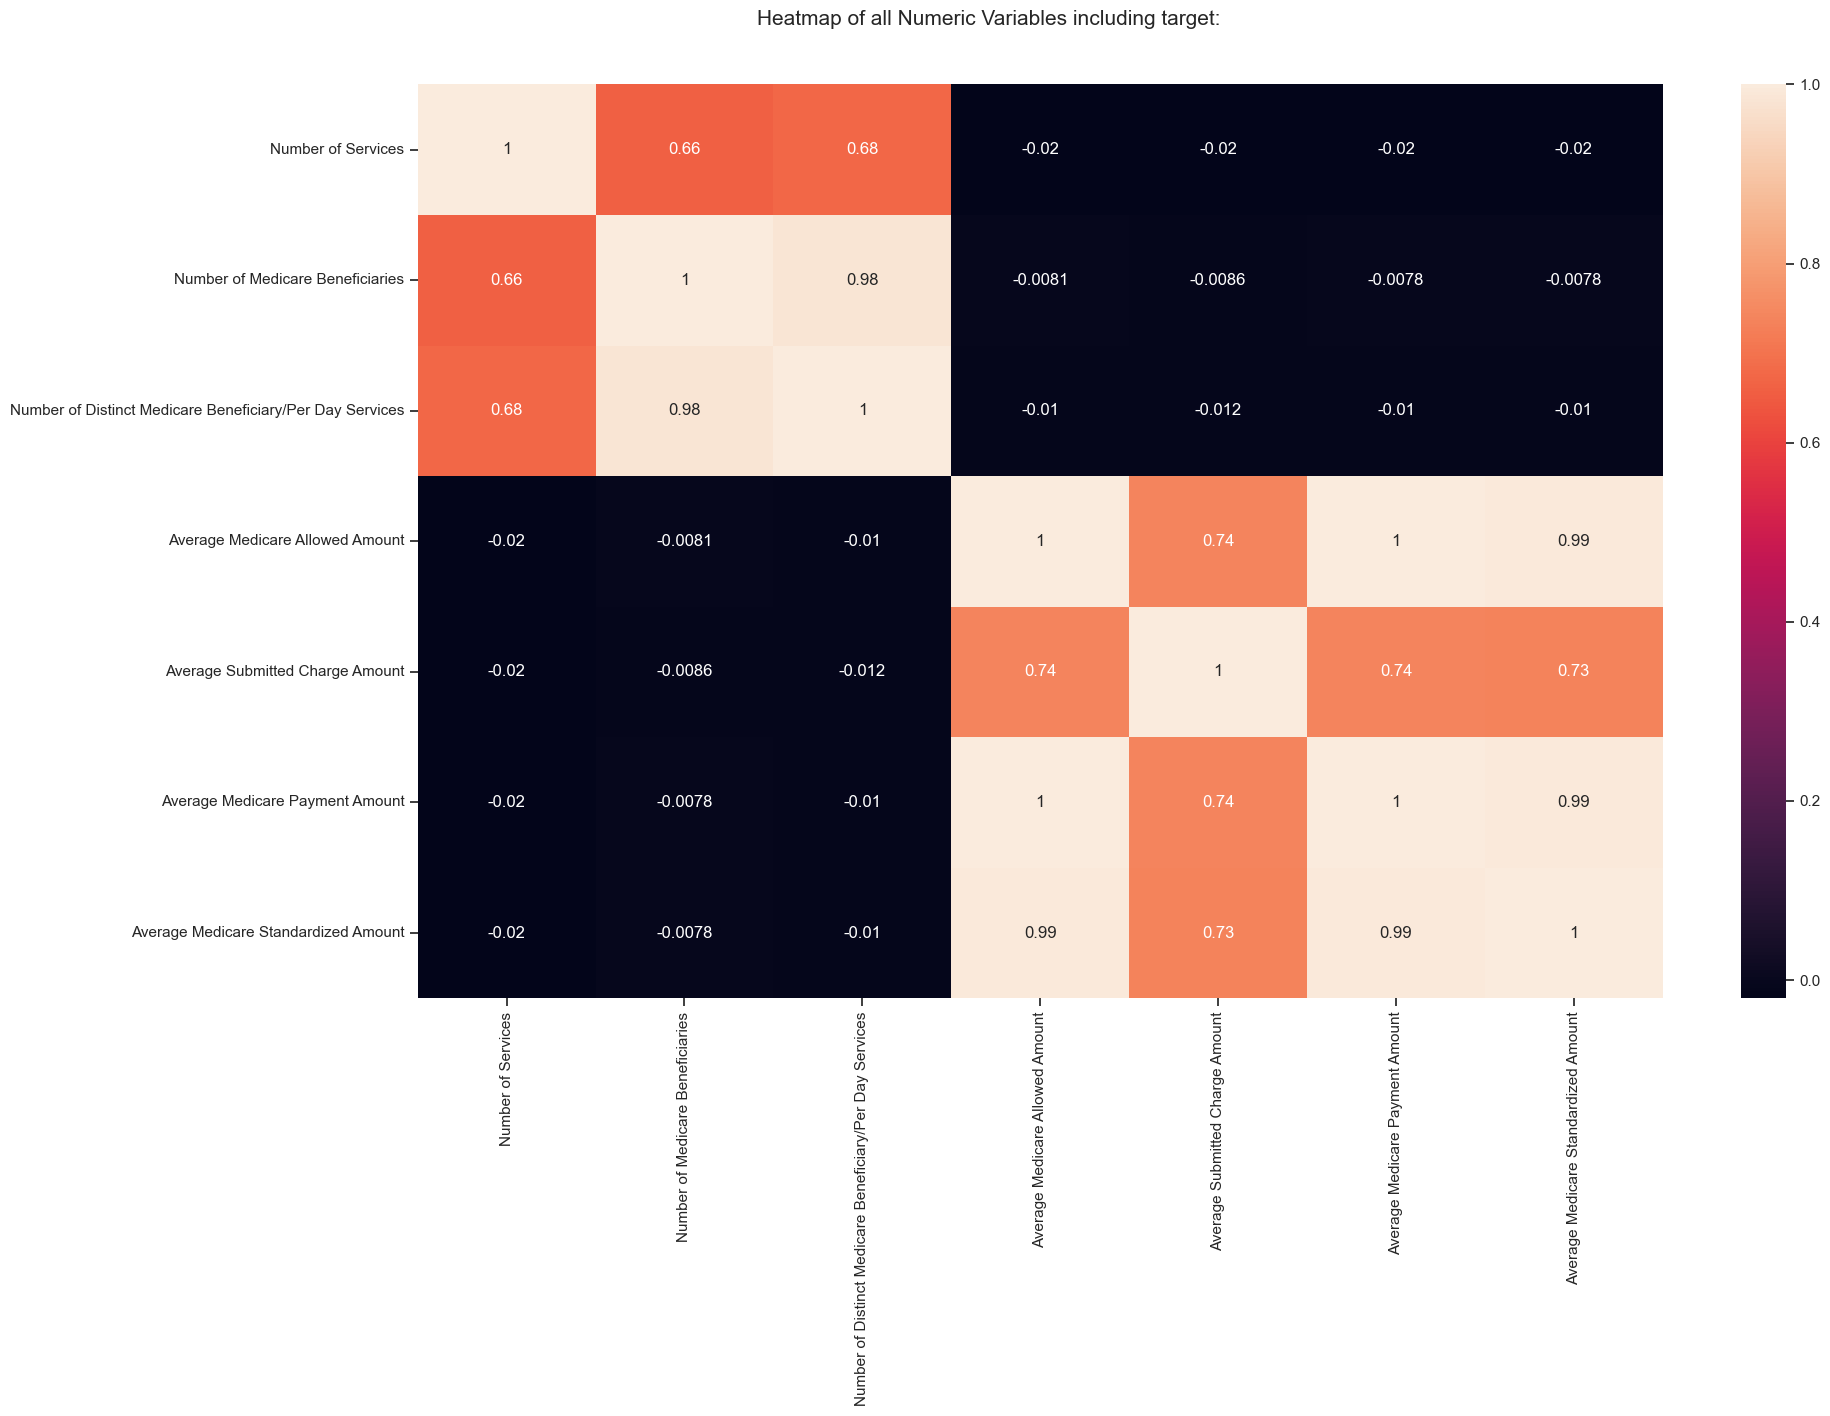

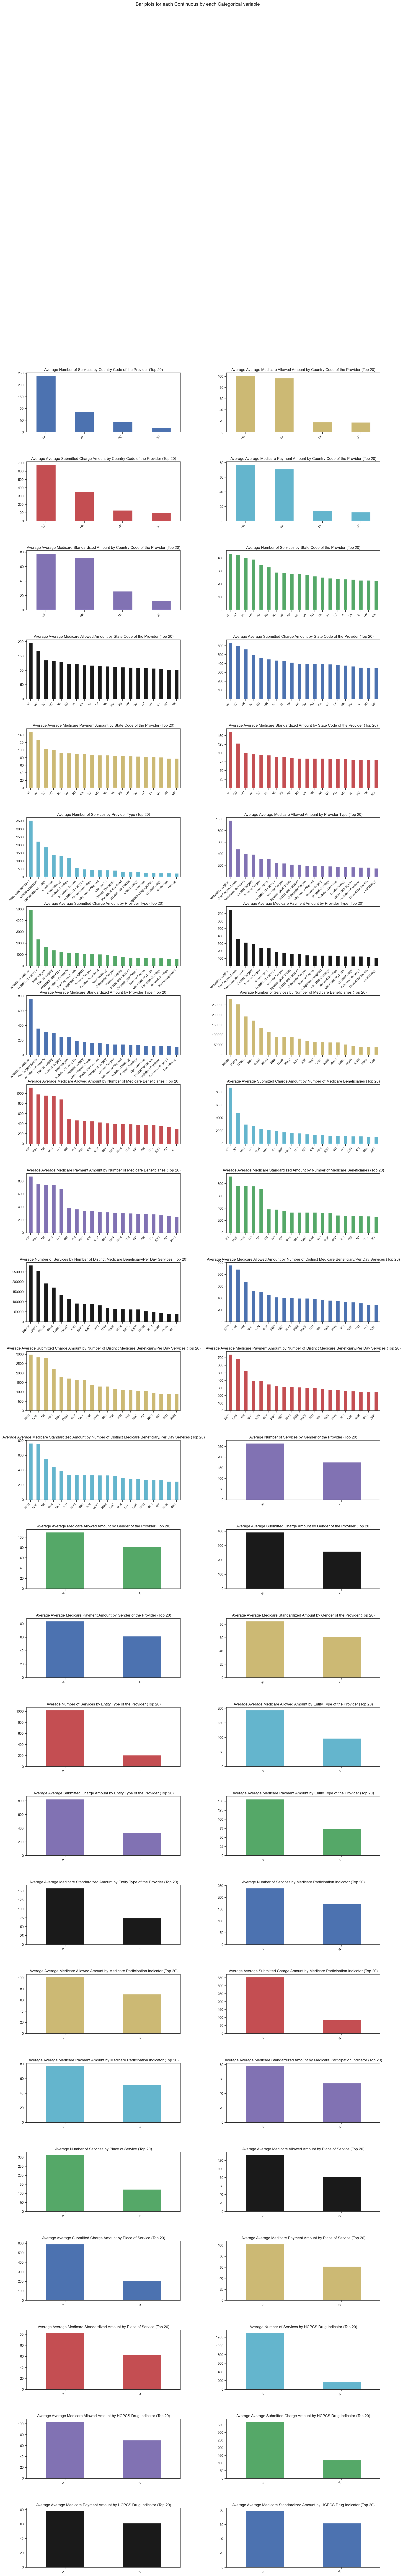

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Pushpendra.PUSHPENDRA-
[nltk_data]    |     PC.001\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Pushpendra.PUSHPENDRA-
[nltk_data]    |     PC.001\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Pushpendra.PUSHPENDRA-
[nltk_data]    |     PC.001\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Pushpendra.PUSHPENDRA-
[nltk_data]    |     PC.001\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]  

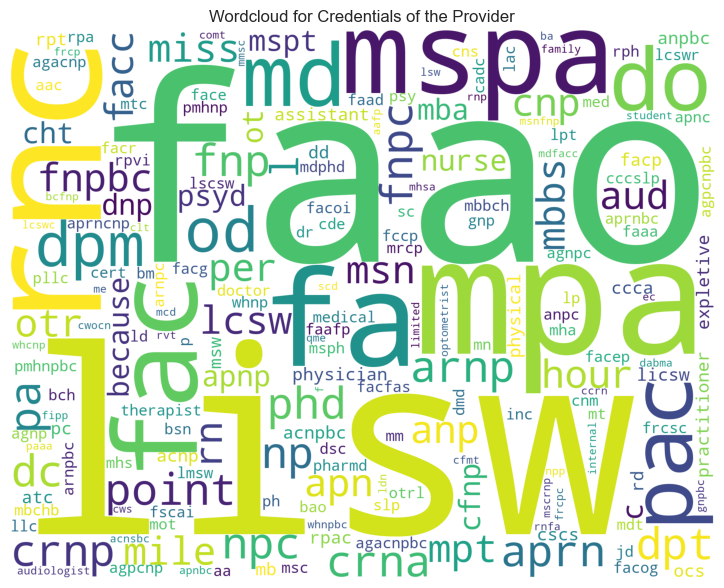

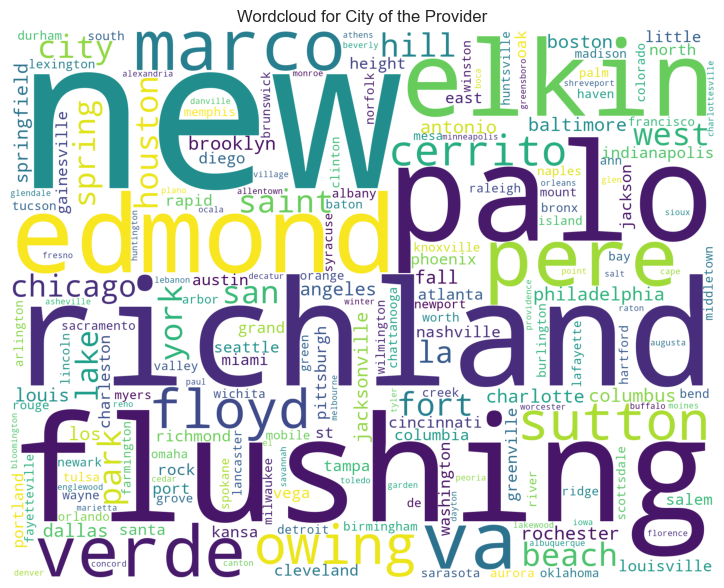

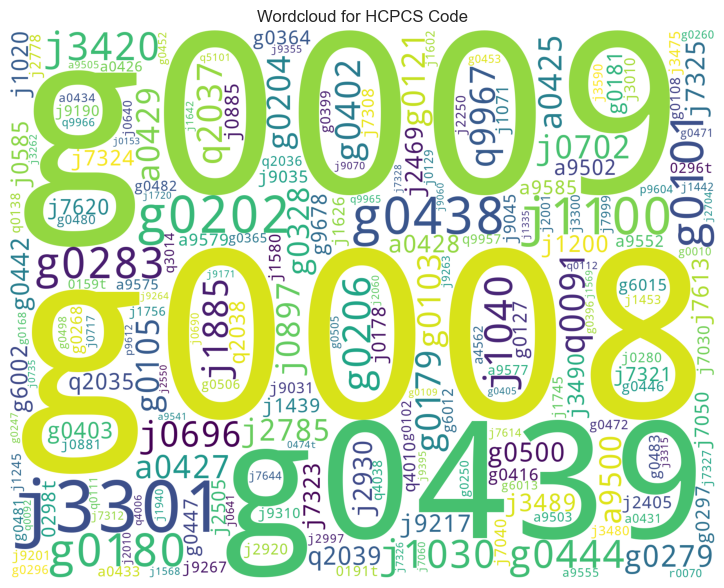

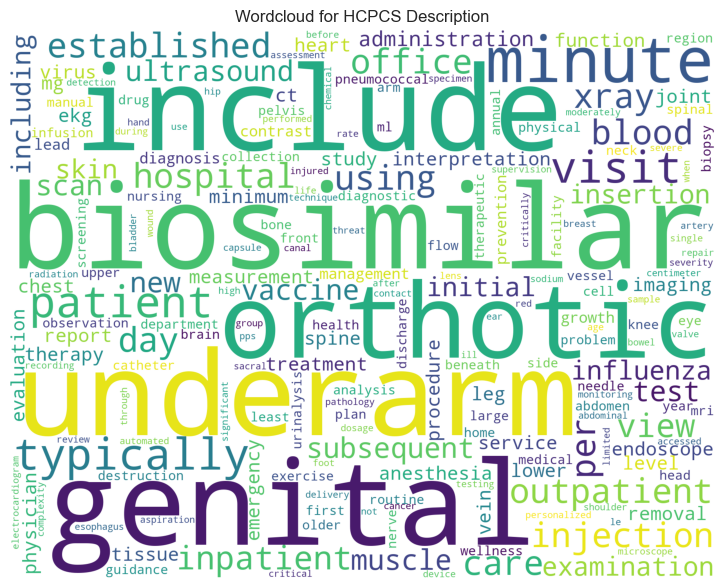

All Plots done
Time to run AutoViz = 181 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [97]:
%matplotlib inline
from autoviz import AutoViz_Class
AV = AutoViz_Class()

dft = AV.AutoViz(df, chart_format="png")